#Information of team


**<p style="text-align: center;">DANH SÁCH THÀNH VIÊN NHÓM 02</p>**

|   MSSV   |       Họ và tên      |                 Chi tiết phân công                | Tỉ lệ % đóng góp |   Ghi chú   |
|:--------:|:--------------------:|:-------------------------------------------------:|:----------------:|:-----------:|
| 21280070 | Võ Thị Khánh Linh    | EDA, PCA, Conclusion, tổng hợp và nộp bài         |        100       | Nhóm trưởng |
| 21280113 | Lê Quang Trung       | Clustering, tìm hiểu domain knowledge             |        100       |             |
| 21280112 | Nguyễn Nhật Minh Thư | EDA, Clustering, tìm hiểu domain knowledge        |        100       |             |
| 21280035 | Nguyễn Phúc Gia Nghi | Clustering (time), forecast "Gia KL"              |        100       |             |
| 21280066 | Phạm Nhật Hào        | Clustering, tìm pattern, fix bug (hỗ trợ cả team) |        100       |             |

# Loading Package

##Install for using package in R

In [ ]:
import subprocess
import IPython

def run_command(command):
    print("Do command : ", command)
    subprocess.run(command, shell=True, stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    print("Finished !!!")

run_command('wget -cO - https://github.com/NNMThuw/Introduction-to-Data-Science/blob/main/requirements.txt?raw=true > requirements.txt')
run_command('pip install -r requirements.txt')
run_command('pip install -Iv rpy2==3.4.2')
run_command('pip install -U ipykernel')
run_command('apt-get install r-base')
run_command('wget -cO - https://github.com/NNMThuw/Introduction-to-Data-Science/blob/main/nsprcomp.r?raw=true > nsprcomp.R')
# Restart the kernel using IPython magic command
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

Do command :  wget -cO - https://github.com/NNMThuw/Introduction-to-Data-Science/blob/main/requirements.txt?raw=true > requirements.txt
Finished !!!
Do command :  pip install -r requirements.txt
Finished !!!
Do command :  pip install -Iv rpy2==3.4.2
Finished !!!
Do command :  pip install -U ipykernel
Finished !!!
Do command :  apt-get install r-base
Finished !!!
Do command :  wget -cO - https://github.com/NNMThuw/Introduction-to-Data-Science/blob/main/nsprcomp.r?raw=true > nsprcomp.R
Finished !!!


{'status': 'ok', 'restart': True}

In [ ]:
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri
import rpy2.robjects as ro
import rpy2.robjects.numpy2ri
rpy2.robjects.numpy2ri.activate()

robjects.r('''source('/content/nsprcomp.R')''')

<rpy2.robjects.vectors.ListVector object at 0x7f1c015dc340> [RTYPES.VECSXP]
R classes: ('list',)
[SexpClosure, BoolSexpVector]
  value: <class 'rpy2.rinterface.SexpClosure'>
  <rpy2.rinterface.SexpClosure object at 0x7f1c014c69c0> [RTYPES.CLOSXP]
  visible: <class 'rpy2.rinterface.BoolSexpVector'>
  <rpy2.rinterface.BoolSexpVector object at 0x7f1bd1dc8a40> [RTYPES.LGLSXP]

In [ ]:
nsprcomp = robjects.globalenv['nsprcomp']

nsprcomp là non-negative PCA được cài được trong R, tham khảo tại: https://cran.r-project.org/web/packages/nsprcomp/nsprcomp.pdf

## Import package in Python

In [ ]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.colors as mcolors
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, mean_squared_error
from tslearn.clustering import TimeSeriesKMeans

from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
from statsmodels.graphics.tsaplots import plot_pacf

import scipy.cluster.hierarchy as shc

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

## Import data

In [ ]:
!wget -cO - https://github.com/NNMThuw/Introduction-to-Data-Science/blob/main/df_merged.pkl?raw=true > df_merged.pkl

--2023-05-13 13:04:12--  https://github.com/NNMThuw/Introduction-to-Data-Science/blob/main/df_merged.pkl?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/NNMThuw/Introduction-to-Data-Science/raw/main/df_merged.pkl [following]
--2023-05-13 13:04:12--  https://github.com/NNMThuw/Introduction-to-Data-Science/raw/main/df_merged.pkl
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/NNMThuw/Introduction-to-Data-Science/main/df_merged.pkl [following]
--2023-05-13 13:04:13--  https://raw.githubusercontent.com/NNMThuw/Introduction-to-Data-Science/main/df_merged.pkl
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserconten

**We use 3 Data Frames:**
+ **total_df**


**total_df** là DataFrame được gộp (theo cột) từ 23 DataFrame trong file df_merged.pkl

In [ ]:
file = open('df_merged.pkl', 'rb')
data = pickle.load(file)
data = pd.DataFrame(data)
total_df = pd.DataFrame()
for i in range(0, len(data)):
    total_df = pd.concat([total_df, data[0][22-i]])

In [ ]:
display(total_df)
print("The training data begins on {} and ends on {}.\n".format(total_df.index.min(),total_df.index.max()))
print(total_df.shape)

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  \
_time                                                                 
2023-03-20 02:17:00+00:00     24.200000          81.1          45.9   
2023-03-20 02:17:10+00:00     24.200000          81.1          45.9   
2023-03-20 02:17:20+00:00     24.200000          81.1          45.9   
2023-03-20 02:17:30+00:00     24.200000          81.1          45.9   
2023-03-20 02:17:40+00:00     24.200000          81.1          45.8   
...                                 ...           ...           ...   
2023-04-19 07:29:40+00:00     24.400000          78.7          44.4   
2023-04-19 07:29:50+00:00     24.441667          78.7          44.4   
2023-04-19 07:30:00+00:00     24.433333          78.7          44.4   
2023-04-19 07:30:10+00:00     24.450000          78.7          44.4   
2023-04-19 07:30:20+00:00     24.416667          78.7          44.4   

                           mua_gia_1BVH  mua_gia_1CTG  mua_gia_1FPT  \
_time                                                                 
2023-03-20 02:17:00+00:00         49.80     28.733333          79.0   
2023-03-20 02:17:10+00:00         49.80     28.750000          79.0   
2023-03-20 02:17:20+00:00         49.55     28.750000          79.0   
2023-03-20 02:17:30+00:00         49.55     28.750000          79.0   
2023-03-20 02:17:40+00:00         49.55     28.700000          78.6   
...                                 ...           ...           ...   
2023-04-19 07:29:40+00:00         46.25     28.750000          79.3   
2023-04-19 07:29:50+00:00         46.25     28.750000          79.3   
2023-04-19 07:30:00+00:00         46.25     28.750000          79.3   
2023-04-19 07:30:10+00:00         46.25     28.750000          79.3   
2023-04-19 07:30:20+00:00         46.25     28.750000          79.3   

                           mua_gia_1GAS  mua_gia_1GVR  mua_gia_1HDB  \
_time                                                                 
2023-03-20 02:17:00+00:00        104.00     14.800000         18.15   
2023-03-20 02:17:10+00:00        104.00     14.800000         18.15   
2023-03-20 02:17:20+00:00        104.00     14.800000         18.15   
2023-03-20 02:17:30+00:00        104.00     14.800000         18.15   
2023-03-20 02:17:40+00:00        104.00     14.800000         18.15   
...                                 ...           ...           ...   
2023-04-19 07:29:40+00:00         95.40     15.050000         19.10   
2023-04-19 07:29:50+00:00         95.40     15.050000         19.10   
2023-04-19 07:30:00+00:00         95.60     15.050000         19.10   
2023-04-19 07:30:10+00:00         95.55     15.091667         19.10   
2023-04-19 07:30:20+00:00         95.55     15.030000         19.10   

                           mua_gia_1HPG  ...  ban_kl_2TCB  ban_kl_2TPB  \
_time                                    ...                             
2023-03-20 02:17:00+00:00     20.350000  ...     0.000000  3000.000000   
2023-03-20 02:17:10+00:00     20.350000  ...  1975.000000  3026.666667   
2023-03-20 02:17:20+00:00     20.383333  ...     0.000000   180.000000   
2023-03-20 02:17:30+00:00     20.400000  ...     0.000000   310.000000   
2023-03-20 02:17:40+00:00     20.393750  ...  1130.000000  3370.000000   
...                                 ...  ...          ...          ...   
2023-04-19 07:29:40+00:00     20.800000  ...     0.000000     0.000000   
2023-04-19 07:29:50+00:00     20.800000  ...     0.000000   703.333333   
2023-04-19 07:30:00+00:00     20.800000  ...  6543.333333  2165.000000   
2023-04-19 07:30:10+00:00     20.800000  ...  6310.000000   770.000000   
2023-04-19 07:30:20+00:00     20.800000  ...  6310.000000   770.000000   

                           ban_kl_2VCB  ban_kl_2VHM  ban_kl_2VIB  ban_kl_2VIC  \
_time                                                                           
2023-03-20 02:17:00+00:00   400.000000         10.0       1720.0        360.0   
2023-03-20 02:17:10+00:00     0.000000         10

The training data begins on 2023-03-20 02:17:00+00:00 and ends on 2023-04-19 07:30:20+00:00.

(30538, 181)


Vì mỗi dòng dữ liệu cách nhau 10 giây nên giá trị về giá mua/giá bán có ít chênh lệch nên quyết định tạo ra một DataFrame thứ 2 gồm các features như cũ và các dòng dữ liệu trong cùng một ngày được gộp lại thành một bằng cách lấy trung bình.
+ **date_df**

In [ ]:
date = pd.date_range(start = '2023-03-20', end = '2023-04-19', freq = 'B')

date_df = pd.DataFrame(columns = total_df.columns)

for d in date:
    date_df = pd.concat([date_df, 
                         pd.concat([pd.DataFrame(total_df.iloc[:, :61].loc[d.strftime("%Y/%m/%d")].mean(axis = 0).values.reshape(1,-1), columns = total_df.columns[:61], index = [d]),
                                    pd.DataFrame(total_df.iloc[:, 61:].loc[d.strftime("%Y/%m/%d")].sum(axis = 0).values.reshape(1,-1), columns = total_df.columns[61:], index = [d])], axis = 1)
                         ])
date_df.index.name = "_time"

In [ ]:
display(date_df)
print("The training data begins on {} and ends on {}.\n".format(date_df.index.min(),date_df.index.max()))
print(date_df.shape)

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  mua_gia_1BVH  \
_time                                                                
2023-03-20     24.106624     81.029513     45.610406     49.397903   
2023-03-21     24.065748     80.613254     45.109280     48.954207   
2023-03-22     24.173907     80.872683     45.918112     48.846350   
2023-03-23     24.105340     80.638340     45.626323     48.615161   
2023-03-24     24.625249     81.304241     45.751623     48.514621   
2023-03-27     24.425314     81.105246     45.638143     48.421800   
2023-03-28     24.509605     81.574218     46.500097     48.691903   
2023-03-29     24.373902     80.969265     45.870171     48.326104   
2023-03-30     24.583606     81.507657     46.453248     48.396054   
2023-03-31     24.898240     81.704654     46.309545     48.477029   
2023-04-03     25.171911     81.893546     46.119740     48.703462   
2023-04-04     25.158705     81.996896     45.823230     48.884976   
2023-04-05     25.130277     81.637751     45.828491     49.048905   
2023-04-06     25.199809     81.120333     45.686207     49.035689   
2023-04-07     24.965669     80.303520     45.721228     48.451344   
2023-04-10     24.994542     79.497965     45.230655     48.553407   
2023-04-11     24.833270     79.558873     44.291332     48.690817   
2023-04-12     24.907619     79.404216     44.341989     49.026209   
2023-04-13     24.901419     79.462292     44.739908     48.475346   
2023-04-14     24.961438     79.469376     44.645106     48.300752   
2023-04-17     24.873800     78.950963     44.615371     47.805296   
2023-04-18     24.854780     78.712259     44.484225     47.295233   
2023-04-19     24.570588     78.791146     44.404526     46.761393   

            mua_gia_1CTG  mua_gia_1FPT  mua_gia_1GAS  mua_gia_1GVR  \
_time                                                                
2023-03-20     28.505816     78.227416    103.294270     14.564015   
2023-03-21     28.202663     77.692250    103.068739     14.310216   
2023-03-22     28.469152     77.988175    102.944717     14.521364   
2023-03-23     28.317287     77.802377    102.364002     14.383944   
2023-03-24     28.630245     78.377431    102.799596     14.832887   
2023-03-27     28.569670     78.704875    102.405005     14.814966   
2023-03-28     28.844662     78.738934    102.659003     15.008502   
2023-03-29     28.911477     78.893677    102.806663     14.712713   
2023-03-30     29.019811     79.013093    102.934301     14.818891   
2023-03-31     28.923606     79.208538    102.353531     14.944428   
2023-04-03     29.527131     79.609693    102.757041     15.747254   
2023-04-04     29.647256     80.517435    102.097995     15.780507   
2023-04-05     29.503490     79.906656    102.127790     16.072183   
2023-04-06     29.711955     80.826877    101.726982     16.101428   
2023-04-07     29.363863     80.113090    101.361620     15.632513   
2023-04-10     29.509528     80.464958    100.606952     16.132012   
2023-04-11     29.300540     80.198511     99.693994     15.812249   
2023-04-12     29.463943     80.150995    100.003388     16.491056   
2023-04-13     29.309152     79.873656     99.847138     16.164294   
2023-04-14     29.262429     79.546548     99.576088     15.733952   
2023-04-17     28.953904     79.352116     97.718857     15.332988   
2023-04-18     29.097679     79.519316     97.063754     15.406600   
2023-04-19     28.895221     79.403800     96.463961     15.458107   

            mua_gia_1HDB  mua_gia_1HPG  ...   ban_kl_2TCB   ban_kl_2TPB  \
_time                                   ...                               
2023-03-20     17.854510     20.296673  ...  1.261591e+06  2.782339e+06   
2023-03-21     17.655812     20.025325  ...  4.701003e+06  2.050933e+06   
2023-03-22     17.603412     20.374673  ...  2.376394e+06  2.065668e+06   
2023-03-23     17.578191     20.175629  ...  2.586722e+06  2.316133e+06   
2023-03-24     17.937816     20.377448  ...  5.477587e+06  3

The training data begins on 2023-03-20 00:00:00 and ends on 2023-04-19 00:00:00.

(23, 181)


+ **time_df**

Là data được merge theo thời gian giao dịch

In [ ]:
# Chọn 4 features (mỗi mã) để clustering, vì hướng clustering theo thời gian không phù hợp với giá bán/ mua hay sự thay đổi của nó lắm.
prefixs = ['mua_kl_1', 'ban_kl_1', 'mua_kl_2', 'ban_kl_2']

# Tạo ra cột "time" cho mỗi DataFrame là thời gian trong ngày (đã bỏ ngày) của cột "_time"
for i, tmp_df in enumerate(data[0]):
    newTime = data[0][i].index.strftime('%H:%M:%S')
    data[0][i]["time"] = newTime

# Set index lại cho từng DataFrame để chuẩn bị merge
for i in range(len(data)):
    data[0][i] = data[0][i].reset_index()
    data[0][i] = data[0][i].set_index("time")

# Do cần clustering theo thời gian trong ngày của từng feature của các mã nên hai cột "_time" và "Gia KL" không cần thiết 
time_df = data[0][0].drop(["_time", "Gia KL"], axis=1)

# Merge 23 DataFrame theo giờ trong ngày
for i in range(22):
    time_tmp_df = data[0][i+1].drop(["_time", "Gia KL"], axis=1)
    time_df = pd.merge(time_df, time_tmp_df, left_index=True, right_index=True, how="outer", suffixes = ("", f"{i+1}"))

In [ ]:
time_df = time_df.fillna(0)
time_df

mua_gia_1ACB  mua_gia_1BCM  mua_gia_1BID  mua_gia_1BVH  \
time                                                               
02:15:30         24.75          78.7          44.6         47.05   
02:15:40         24.75          78.7          44.6         47.05   
02:15:50         24.75          78.7          44.6         47.05   
02:16:00         24.75          78.7          44.6         47.05   
02:16:10         24.75          78.7          44.6         47.05   
...                ...           ...           ...           ...   
07:31:00          0.00           0.0           0.0          0.00   
07:31:10          0.00           0.0           0.0          0.00   
07:31:20          0.00           0.0           0.0          0.00   
07:31:30          0.00           0.0           0.0          0.00   
07:31:40          0.00           0.0           0.0          0.00   

          mua_gia_1CTG  mua_gia_1FPT  mua_gia_1GAS  mua_gia_1GVR  \
time                                                               
02:15:30         29.05          79.5          97.0          15.5   
02:15:40         29.05          79.5          97.0          15.5   
02:15:50         29.05          79.5          97.0          15.5   
02:16:00         29.05          79.5          97.0          15.5   
02:16:10         29.05          79.5          97.0          15.5   
...                ...           ...           ...           ...   
07:31:00          0.00           0.0           0.0           0.0   
07:31:10          0.00           0.0           0.0           0.0   
07:31:20          0.00           0.0           0.0           0.0   
07:31:30          0.00           0.0           0.0           0.0   
07:31:40          0.00           0.0           0.0           0.0   

          mua_gia_1HDB  mua_gia_1HPG  ...  ban_kl_2TCB22  ban_kl_2TPB22  \
time                                  ...                                 
02:15:30         19.25          21.0  ...            0.0            0.0   
02:15:40         19.25          21.0  ...            0.0            0.0   
02:15:50         19.25          21.0  ...            0.0            0.0   
02:16:00         19.25          21.0  ...            0.0            0.0   
02:16:10         19.25          21.0  ...            0.0            0.0   
...                ...           ...  ...            ...            ...   
07:31:00          0.00           0.0  ...          290.0          200.0   
07:31:10          0.00           0.0  ...            0.0            0.0   
07:31:20          0.00           0.0  ...            0.0            0.0   
07:31:30          0.00           0.0  ...            0.0            0.0   
07:31:40          0.00           0.0  ...            0.0            0.0   

          ban_kl_2VCB22  ban_kl_2VHM22  ban_kl_2VIB22  ban_kl_2VIC22  \
time                                                                   
02:15:30            0.0            0.0            0.0            0.0   
02:15:40            0.0            0.0            0.0            0.0   
02:15:50            0.0            0.0            0.0            0.0   
02:16:00            0.0            0.0            0.0            0.0   
02:16:10            0.0            0.0            0.0            0.0   
...                 ...            ...            ...            ...   
07:31:00          490.0            0.0            0.0         2062.5   
07:31:10            0.0            0.0            0.0            0.0   
07:31:20            0.0            0.0            0.0            0.0   
07:31:30            0.0            0.0            0.0            0.0   
07:31:40            0.0            0.0            0.0            0.0   

          ban_kl_2VJC22  ban_kl_2VNM22  ban_kl_2VPB22  ban_kl_2VRE22  
time                                                                  
02:15:30            0.0            0.0            0.0            0.0  
02:15:40            0.0            0.0            0.0            0.0  
02:15:50            0.0            0.0     

## Group feature

**Phân nhóm các feature thành 4 nhóm sau:**
1. Giá mua
2. Giá bán
3. Khối lượng mua (Gộp cả khối lượng mua giá khớp lệnh 1 và giá khớp lệnh 2)
4. Khối lượng bán (Gộp cả khối lượng bán giá khớp lệnh 1 và giá khớp lệnh 2

**Ngoài ra ta có một biến có thể xem như *Target* là *Gia KL***

In [ ]:
total_buy_price = total_df.iloc[:,0:30]
total_sell_price = total_df.iloc[:,30:60]

total_buy_weight = pd.DataFrame(columns= total_df.columns[61:91])
total_sell_weight = pd.DataFrame(columns= total_df.columns[91:121])

for i in range(30):
    total_buy_weight.iloc[:,i] = total_df.iloc[:,[i+61,i+121]].sum(axis=1)
    total_sell_weight.iloc[:,i] = total_df.iloc[:,[i+91,i+151]].sum(axis=1)

total_target = total_df['Gia KL']

In [ ]:
date_buy_price = date_df.iloc[:,0:30]
date_sell_price = date_df.iloc[:,30:60]

date_buy_weight = pd.DataFrame(columns= date_df.columns[61:91])
date_sell_weight = pd.DataFrame(columns= date_df.columns[91:121])

for i in range(30):
    date_buy_weight.iloc[:,i] = date_df.iloc[:,[i+61,i+121]].sum(axis=1)
    date_sell_weight.iloc[:,i] = date_df.iloc[:,[i+91,i+151]].sum(axis=1)

date_target = date_df['Gia KL']

**Standardazation**

In [ ]:
sc = StandardScaler()
total_buy_price_std = pd.DataFrame(sc.fit_transform(total_buy_price), columns = total_df.columns[0:30])
total_sell_price_std = pd.DataFrame(sc.fit_transform(total_sell_price), columns = total_df.columns[30:60])
total_buy_weight_std = pd.DataFrame(sc.fit_transform(total_buy_weight), columns= total_buy_weight.columns)
total_sell_weight_std = pd.DataFrame(sc.fit_transform(total_sell_weight), columns= total_df.columns[91:121])

date_buy_price_std = pd.DataFrame(sc.fit_transform(date_buy_price), columns = date_df.columns[0:30])
date_sell_price_std = pd.DataFrame(sc.fit_transform(date_sell_price), columns = date_df.columns[30:60])
date_buy_weight_std = pd.DataFrame(sc.fit_transform(date_buy_weight), columns= date_df.columns[61:91])
date_sell_weight_std = pd.DataFrame(sc.fit_transform(date_sell_weight), columns= date_df.columns[91:121])

## Add time-series property

In [ ]:
def add_time_series_property(df):
  df1 = df.reset_index().iloc[:-1, 1:].add_prefix('previous_')
  #print(df1.shape)
  df2 = df.iloc[1:,].reset_index()
  #print(df2.shape)
  new_df =  pd.concat([df1, df2], axis=1).set_index('_time')
  return new_df

In [ ]:
new_total_buy_price = add_time_series_property(total_buy_price)
new_total_buy_price

previous_mua_gia_1ACB  previous_mua_gia_1BCM  \
_time                                                                     
2023-03-20 02:17:10+00:00              24.200000                   81.1   
2023-03-20 02:17:20+00:00              24.200000                   81.1   
2023-03-20 02:17:30+00:00              24.200000                   81.1   
2023-03-20 02:17:40+00:00              24.200000                   81.1   
2023-03-20 02:17:50+00:00              24.200000                   81.1   
...                                          ...                    ...   
2023-04-19 07:29:40+00:00              24.400000                   78.7   
2023-04-19 07:29:50+00:00              24.400000                   78.7   
2023-04-19 07:30:00+00:00              24.441667                   78.7   
2023-04-19 07:30:10+00:00              24.433333                   78.7   
2023-04-19 07:30:20+00:00              24.450000                   78.7   

                           previous_mua_gia_1BID  previous_mua_gia_1BVH  \
_time                                                                     
2023-03-20 02:17:10+00:00                   45.9                  49.80   
2023-03-20 02:17:20+00:00                   45.9                  49.80   
2023-03-20 02:17:30+00:00                   45.9                  49.55   
2023-03-20 02:17:40+00:00                   45.9                  49.55   
2023-03-20 02:17:50+00:00                   45.8                  49.55   
...                                          ...                    ...   
2023-04-19 07:29:40+00:00                   44.4                  46.25   
2023-04-19 07:29:50+00:00                   44.4                  46.25   
2023-04-19 07:30:00+00:00                   44.4                  46.25   
2023-04-19 07:30:10+00:00                   44.4                  46.25   
2023-04-19 07:30:20+00:00                   44.4                  46.25   

                           previous_mua_gia_1CTG  previous_mua_gia_1FPT  \
_time                                                                     
2023-03-20 02:17:10+00:00              28.733333                   79.0   
2023-03-20 02:17:20+00:00              28.750000                   79.0   
2023-03-20 02:17:30+00:00              28.750000                   79.0   
2023-03-20 02:17:40+00:00              28.750000                   79.0   
2023-03-20 02:17:50+00:00              28.700000                   78.6   
...                                          ...                    ...   
2023-04-19 07:29:40+00:00              28.750000                   79.3   
2023-04-19 07:29:50+00:00              28.750000                   79.3   
2023-04-19 07:30:00+00:00              28.750000                   79.3   
2023-04-19 07:30:10+00:00              28.750000                   79.3   
2023-04-19 07:30:20+00:00              28.750000                   79.3   

                           previous_mua_gia_1GAS  previous_mua_gia_1GVR  \
_time                                                                     
2023-03-20 02:17:10+00:00                 104.00              14.800000   
2023-03-20 02:17:20+00:00                 104.00              14.800000   
2023-03-20 02:17:30+00:00                 104.00              14.800000   
2023-03-20 02:17:40+00:00                 104.00              14.800000   
2023-03-20 02:17:50+00:00                 104.00              14.800000   
...                                          ...                    ...   
2023-04-19 07:29:40+00:00                  95.40              15.050000   
2023-04-19 07:29:50+00:00                  95.40              15.050000   
2023-04-19 07:30:00+00:00                  95.40              15.050000   
2023-04-19 07:30:10+00:00                  95.60              15.050000   
2023-04-19 07:30:20+00:00                  95.55              15.091667   

                           previous_mua_gia_1HDB  previous_mua_gia_1HPG  ...  \
_time                                      

# EDA

**Tên các features của cùng 1 mã**

In [ ]:
from collections import defaultdict
import re

dd = defaultdict(list)
for each in total_df.columns:
  # print(each)
  try :
    result = re.search(r'\d+(.+)',str(each)).group(1)
    dd[result].append(each)
  except:
    print(each)

Gia KL


In [ ]:
for ma, features in dd.items():
  print(ma, features)

ACB ['mua_gia_1ACB', 'ban_gia_1ACB', 'mua_kl_1ACB', 'ban_kl_1ACB', 'mua_kl_2ACB', 'ban_kl_2ACB']
BCM ['mua_gia_1BCM', 'ban_gia_1BCM', 'mua_kl_1BCM', 'ban_kl_1BCM', 'mua_kl_2BCM', 'ban_kl_2BCM']
BID ['mua_gia_1BID', 'ban_gia_1BID', 'mua_kl_1BID', 'ban_kl_1BID', 'mua_kl_2BID', 'ban_kl_2BID']
BVH ['mua_gia_1BVH', 'ban_gia_1BVH', 'mua_kl_1BVH', 'ban_kl_1BVH', 'mua_kl_2BVH', 'ban_kl_2BVH']
CTG ['mua_gia_1CTG', 'ban_gia_1CTG', 'mua_kl_1CTG', 'ban_kl_1CTG', 'mua_kl_2CTG', 'ban_kl_2CTG']
FPT ['mua_gia_1FPT', 'ban_gia_1FPT', 'mua_kl_1FPT', 'ban_kl_1FPT', 'mua_kl_2FPT', 'ban_kl_2FPT']
GAS ['mua_gia_1GAS', 'ban_gia_1GAS', 'mua_kl_1GAS', 'ban_kl_1GAS', 'mua_kl_2GAS', 'ban_kl_2GAS']
GVR ['mua_gia_1GVR', 'ban_gia_1GVR', 'mua_kl_1GVR', 'ban_kl_1GVR', 'mua_kl_2GVR', 'ban_kl_2GVR']
HDB ['mua_gia_1HDB', 'ban_gia_1HDB', 'mua_kl_1HDB', 'ban_kl_1HDB', 'mua_kl_2HDB', 'ban_kl_2HDB']
HPG ['mua_gia_1HPG', 'ban_gia_1HPG', 'mua_kl_1HPG', 'ban_kl_1HPG', 'mua_kl_2HPG', 'ban_kl_2HPG']
MBB ['mua_gia_1MBB', 'ban_gia_

##Statistics

In [ ]:
display(total_buy_price.describe().style.format('{:,.2f}'))

In [ ]:
display(total_sell_price.describe().style.format('{:,.2f}'))

**Nhận xét:** Giá của các mã có sự chênh lệch, có thể gấp nhiều lần nhau, do đó tùy theo thuật toán áp dụng, có thể cần phải standardization.

In [ ]:
display(total_buy_weight.describe().style.format('{:,.2f}'))

In [ ]:
display(total_sell_weight.describe().style.format('{:,.2f}'))

**Nhận xét:** Số lượng đặt mua/bán có khá nhiều số 0, đồng thời giá trị max rất lớn nên kéo theo std lớn.

##Visualization

**Plot 'Gia KL'** để có cái nhìn tổng quan về xu hướng của thị trường trong khoảng thời gian của datasets. Có áp dụng Moving Average để làm "mịn".

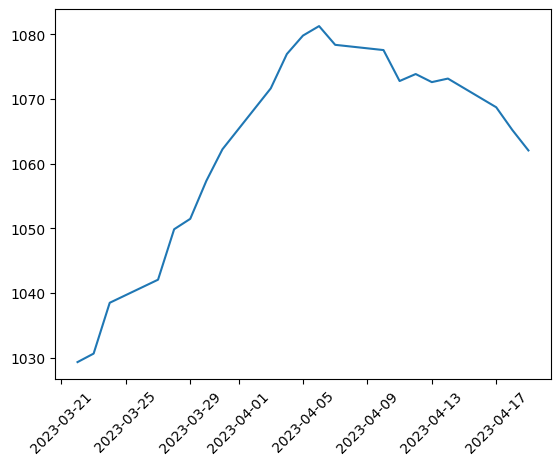

In [ ]:
plt.plot(date_df['Gia KL'].rolling(window = 3).mean())
plt.xticks(rotation = 45)
plt.show()

**Plot tổng khối lượng 1 và 2 mua/bán** của từng mã để xem sự biến động.



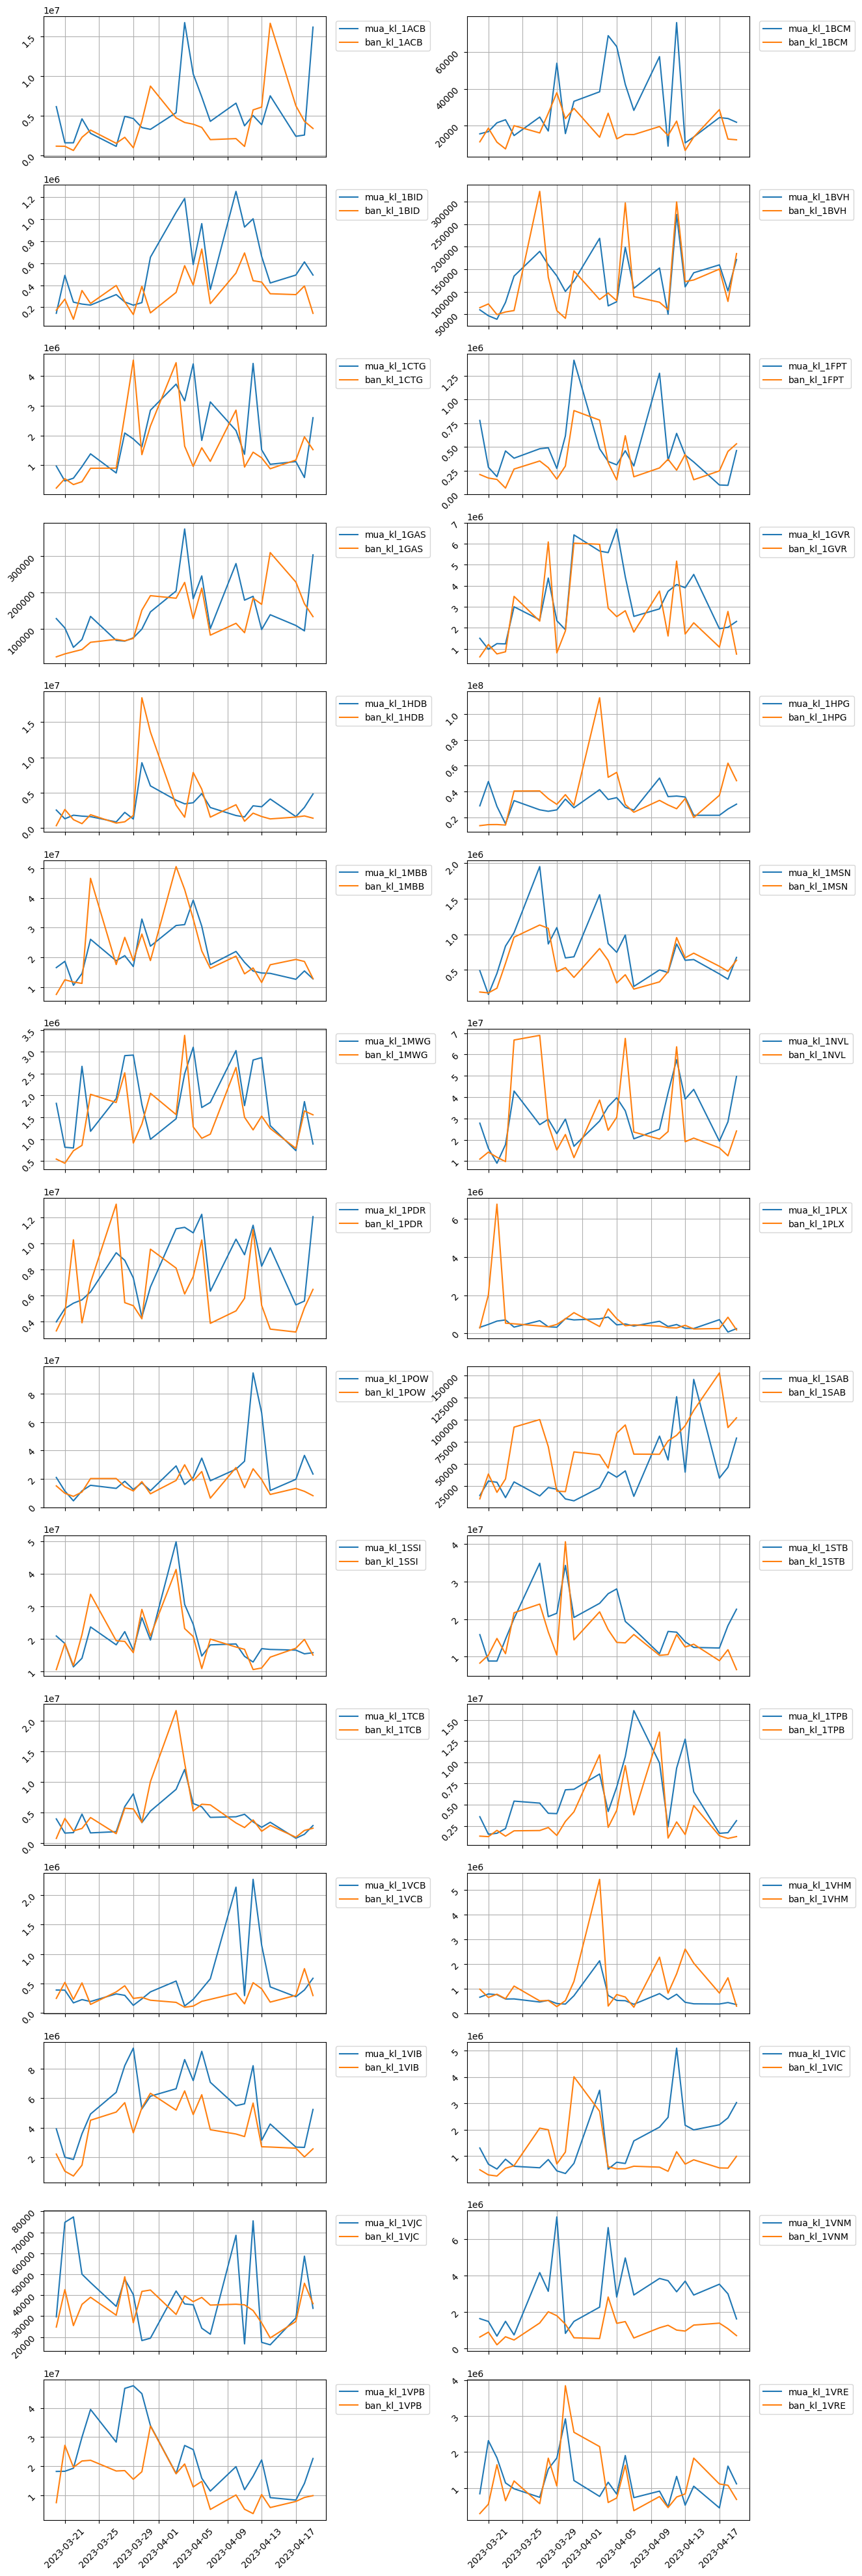

In [ ]:
fig, axs = plt.subplots(15, 2, sharex=True, figsize = (14,50))
fig.subplots_adjust(hspace=0.2)
fig.subplots_adjust(wspace=0.5)

for i in range(30):
    axs[int(i/2),i%2].plot(date_df.iloc[:, i+61], label= date_df.iloc[:,i+61].name)
    axs[int(i/2),i%2].plot(date_df.iloc[:, i+91], label= date_df.iloc[:,i+91].name)
    axs[int(i/2),i%2].grid()
    axs[int(i/2),i%2].legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
    axs[int(i/2),i%2].tick_params(rotation=45)
plt.show()

**Nhận xét:** Khối lượng mua/bán biến động dữ dội, cần làm những phân tích sâu hơn ở phần Clustering để nắm bắt được những điểm chung/riêng của chúng.

**Phần trăm sự thay đổi giá bán** so với ngày trước đó của các mã:

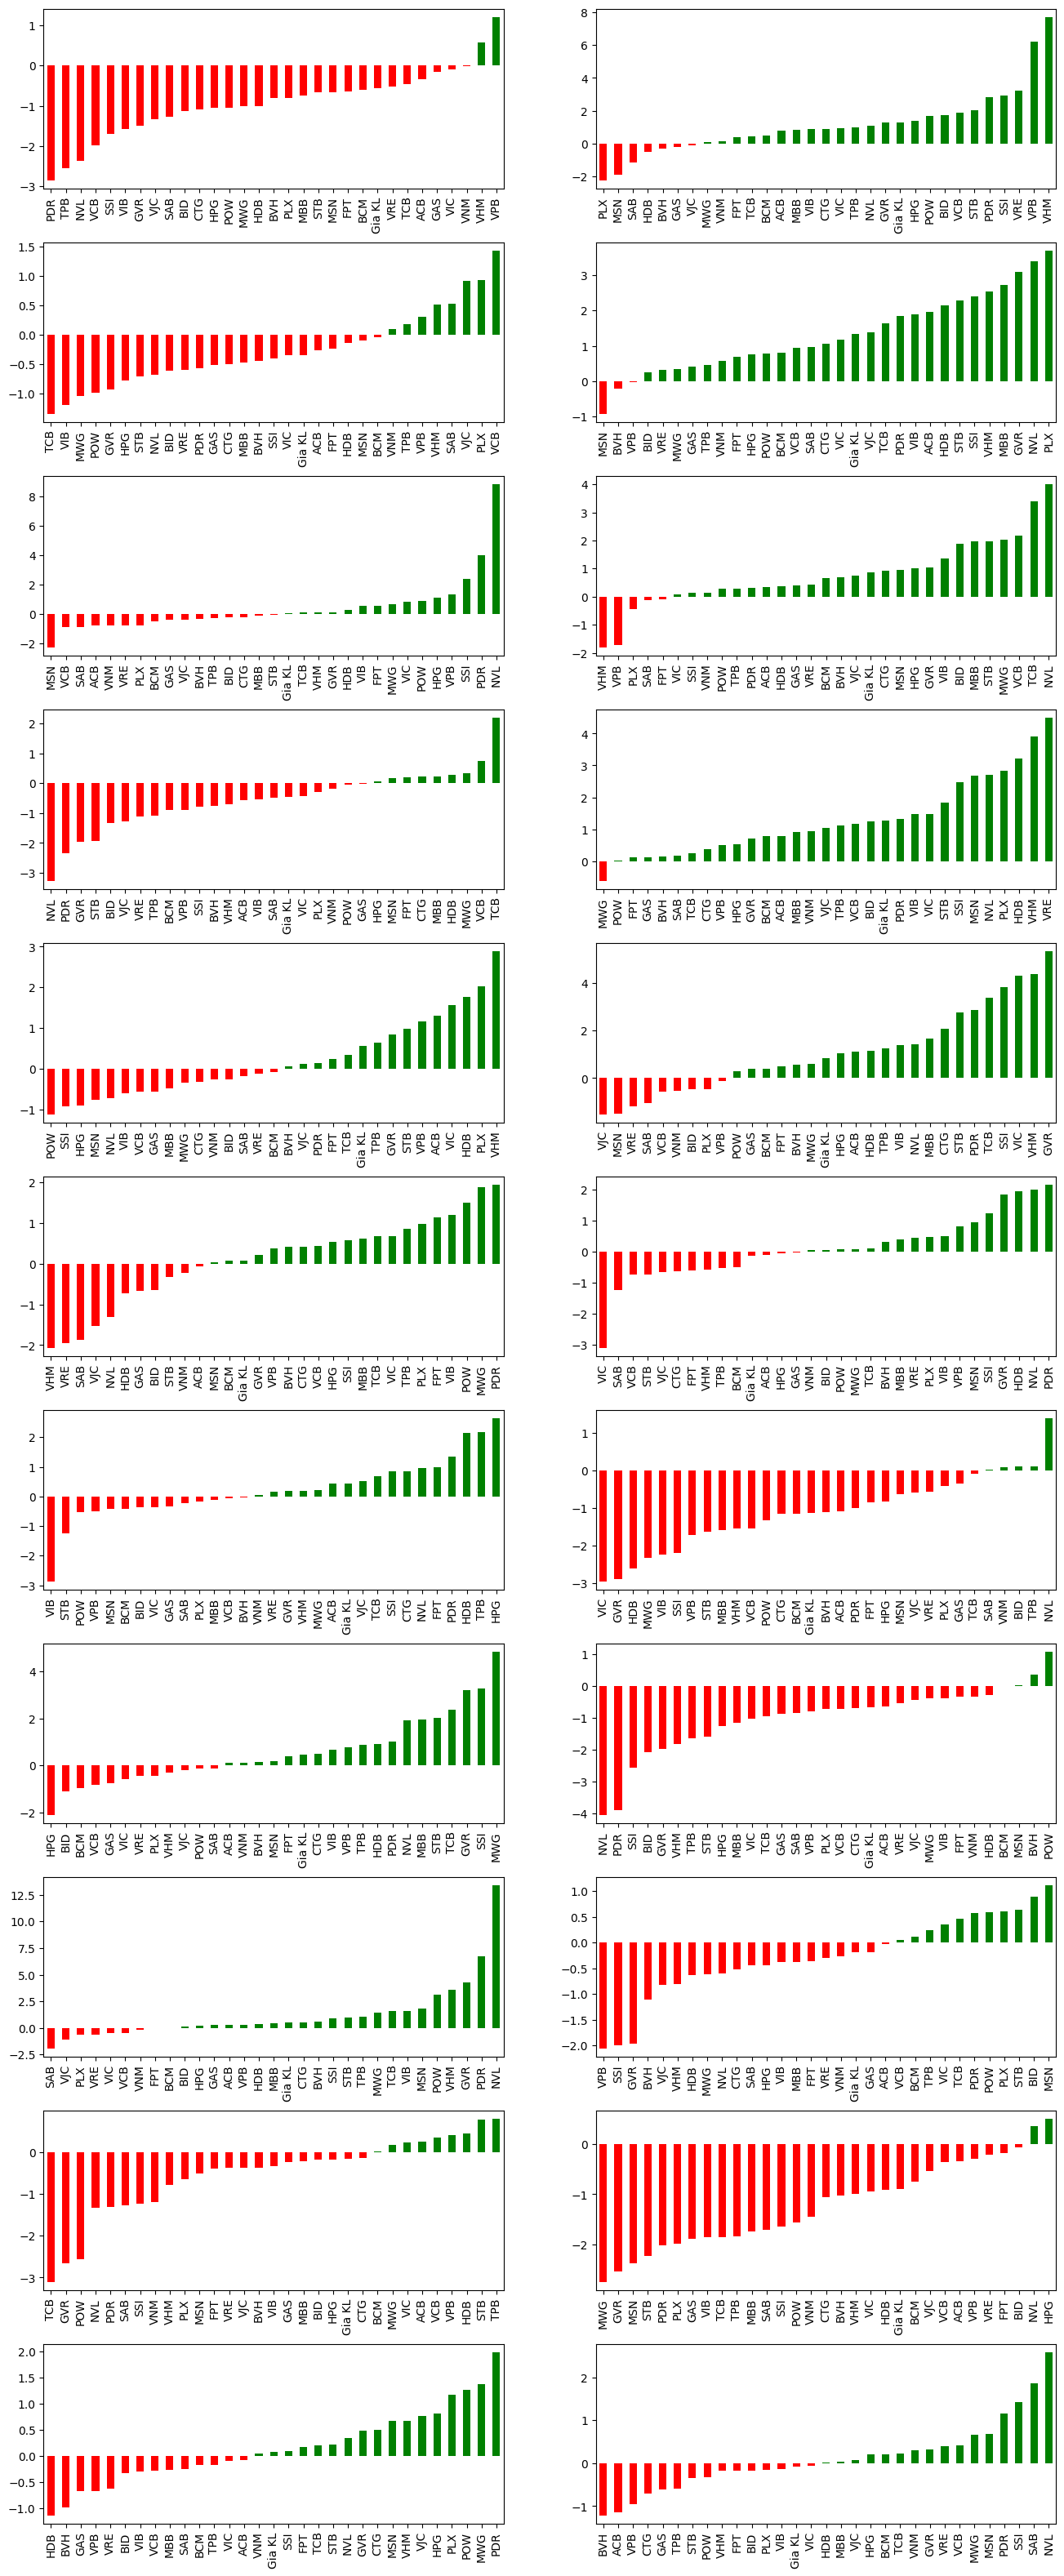

In [ ]:
sell_pct = date_df.pct_change().iloc[1:, 30:61].mul(100)
sell_pct.columns = list(dd.keys()) + ['Gia KL']
fig, axes = plt.subplots(11, 2, figsize = (16,40))
fig.subplots_adjust(hspace=0.3)
fig.subplots_adjust(wspace=0.2)

for i in range(22):
    a = sell_pct.iloc[i].sort_values()
    a.plot(ax=axes[int(i/2),i%2], kind = 'bar',color=(a > 0).map({True: 'g',False: 'r'}))
plt.show()

**Nhận xét:** Ta nhận thấy rằng **Gia KL** có xu hướng tăng/giảm phụ thuộc vào sự tăng/giảm của 30 Mã CK. Cụ thể là khi có nhiều Mã CK có giá tăng so với ngày trước thì **Gia KL** cũng có xu hướng tăng theo và ngược lại. Còn khi số lượng Mã tăng/giảm khá tương đồng thì **Gia KL** cũng có xu hướng không đổi.

# PCA

Ở phần này, tụi em sẽ làm kỹ đối với Buy Price, sau đó lựa chọn hướng giải quyết và áp dụng tương tự cho các nhóm còn lại.

## Buy Price

### Total DataFrame

In [ ]:
new_total_buy_price_std = StandardScaler().fit_transform(new_total_buy_price)

In [ ]:
pca = PCA(n_components = 2)
data_pca = pca.fit_transform(new_total_buy_price_std)
print(pca.explained_variance_ratio_)

[0.4685411  0.24678022]


In [ ]:
print("\n>> 1st eigen vector : \n", pca.components_[0])


>> 1st eigen vector : 
 [-0.12650001  0.07648168  0.07144542  0.04711762 -0.16456089 -0.14207132
  0.1016112  -0.17381197 -0.1774471  -0.11427173 -0.16760433  0.04246686
 -0.15772867 -0.16090703 -0.17502903 -0.1476353  -0.10866158  0.14548787
 -0.17172155 -0.15851251 -0.17982487 -0.16403929 -0.03331473 -0.16345983
 -0.07674389 -0.07477188  0.11649812  0.0527696  -0.05375579  0.00147413
 -0.12639768  0.07649992  0.07144359  0.04724087 -0.16455029 -0.14188572
  0.1017095  -0.17380415 -0.17745903 -0.1142488  -0.16760976  0.04243593
 -0.15768846 -0.16087547 -0.17501389 -0.14789611 -0.10860158  0.14548805
 -0.17165921 -0.1585048  -0.17990703 -0.16405515 -0.03355275 -0.16340394
 -0.07672621 -0.07474514  0.11655115  0.05274901 -0.05362509  0.00145423]


PC1 có chứa phần tử âm nên khó để giải thích về tầm quan trọng của feature ban đầu theo nghĩa trọng số. Đề xuất 3 hướng giải quyết:

**Hướng 1: Lấy trị tuyệt đối từng thành phần** 

Lý do: tầm quan trọng có thể là ảnh hưởng tích cực (đồng biến) hoặc tiêu cực (nghịch biến) với xu hướng chung của thị trường. Để giữ lại tính + hay - thì phần tử vẫn giữ nguyên dấu, phần mẫu sẽ lấy trị tuyệt đối.

In [ ]:
I_pca = pca.components_[0]/np.sum(abs(pca.components_[0]))*100
print(I_pca)

[-1.78281811  1.07788873  1.00691046  0.66404852 -2.31922621 -2.00227122
  1.43204956 -2.44960563 -2.50083706 -1.61047987 -2.36211879  0.59850341
 -2.2229368  -2.26773083 -2.46675823 -2.08068671 -1.53141355  2.05042204
 -2.42014446 -2.23398392 -2.53434794 -2.31187513 -0.46951862 -2.30370849
 -1.08158416 -1.05379171  1.64185731  0.74370429 -0.75760309  0.0207755
 -1.78137604  1.0781458   1.00688473  0.66578563 -2.3190768  -1.99965547
  1.43343507 -2.44949536 -2.50100512 -1.61015671 -2.36219529  0.59806747
 -2.22237017 -2.26728601 -2.46654477 -2.08436238 -1.53056801  2.05042457
 -2.4192659  -2.23387517 -2.53550584 -2.31209869 -0.47287312 -2.30292085
 -1.08133489 -1.05341485  1.64260465  0.7434141  -0.75576108  0.0204951 ]


In [ ]:
ma_pca = dict()
i=0
for ma, feature in dd.items():
  ma_pca[ma] = I_pca[i] + I_pca[i+30] #Cộng độ quan trọng của previous và hiện tại của cùng 1 mã
  i=i+1

ma_pca = pd.DataFrame.from_dict([ma_pca]).T.rename(columns= {0:'Contribution'}).sort_values(by ='Contribution', ascending =False)
ma_pca.T

SAB       VJC       GAS       BCM       BID       VNM  \
Contribution  4.100847  3.284462  2.865485  2.156035  2.013795  1.487118   

                   BVH       MSN       VRE       VCB  ...       NVL       VHM  \
Contribution  1.329834  1.196571  0.041271 -0.942392  ... -4.535017 -4.606629   

                   TPB       CTG       MBB      SSI       GVR       PDR  \
Contribution -4.623974 -4.638303 -4.724314 -4.83941 -4.899101 -4.933303   

                   HDB       TCB  
Contribution -5.001842 -5.069854  

[1 rows x 30 columns]

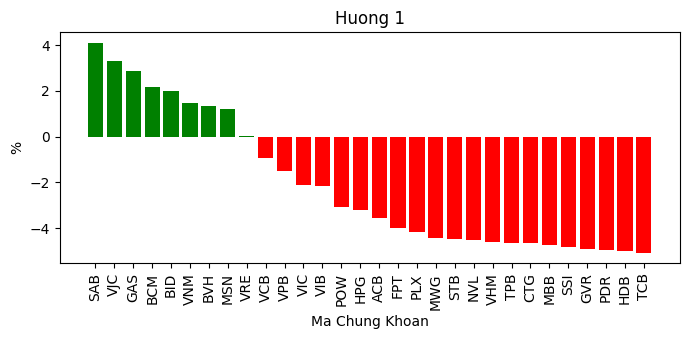

In [ ]:
plt.figure(figsize=(8,3))
plt.bar(ma_pca.index, ma_pca['Contribution'], color = ['g' if x>0 else 'r' for x in ma_pca['Contribution']])
plt.xlabel('Ma Chung Khoan')
plt.ylabel('%')
plt.xticks(rotation = 90)
plt.title('Huong 1')
plt.show()

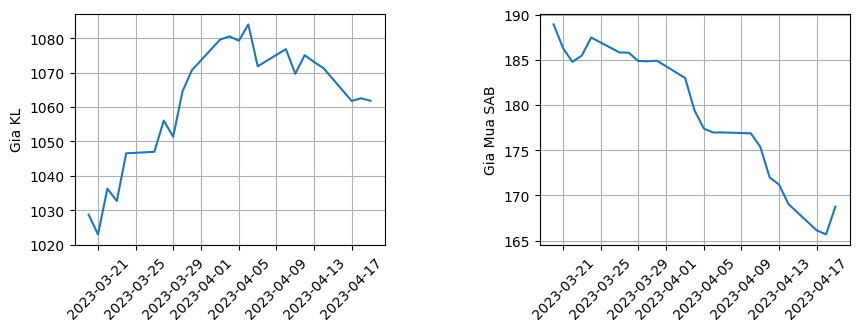

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10,3))
fig.subplots_adjust(wspace=0.5)

axs[0].plot(date_df['Gia KL'])
axs[0].grid()
axs[0].set_ylabel('Gia KL')
axs[0].tick_params(axis='x', labelrotation=45)

axs[1].plot(date_df['mua_gia_1SAB'])
axs[1].grid()
axs[1].set_ylabel('Gia Mua SAB')
axs[1].tick_params(axis='x', labelrotation=45)

plt.show()

Contribution của SAB là dương cao nhất nhưng khi plot lại cảm thấy không hợp lý lắm, chưa nhận thấy sự tương đồng xu hướng với tổng thế thị trường

**Hướng 2: Sử dụng NMF (non-negative matrix factorization)**
Là một thuật toán phân tích ma trận với components không âm, tăng tính giải thích cho bài toán. 

Tham khảo tại: https://scikit-learn.org/stable/modules/decomposition.html#non-negative-matrix-factorization-nmf-or-nnmf

NMF yêu cầu ma trận đầu vào không chứa giá trị âm do đó em không scale data. Em cũng đã thử Min-Max Scaler nhưng nhận được kết quả không hợp lý.

In [ ]:
from sklearn.decomposition import NMF
model = NMF(n_components=1, init='nndsvd', random_state=0)
W = model.fit_transform(new_total_buy_price)
H = model.components_
print("\n>> 1st eigen vector : \n", H)
I_nmf = (H/np.sum(H))*100
print("\n>> Contribution of each features (%):\n ", I_nmf)


>> 1st eigen vector : 
 [[ 15.24841806  49.68435406  28.02378792  29.92556239  17.91835279
   48.93312467  62.46688094   9.46527783  11.62148995  12.79742525
   11.23376055  48.28807183  24.26285842   8.02418251   7.92474665
   22.62827336   8.18759821 110.48248464  13.18505881  15.87019217
   17.56261029  13.87722972  55.27631355  30.595644    13.02450587
   33.08816688  63.27844941  45.7102271   12.77886639  17.93219092
   15.24841747  49.68430588  28.02376365  29.92549074  17.91835348
   48.93313027  62.46671196   9.46528247  11.62151125  12.79743559
   11.23377231  48.28798836  24.26288522   8.02424534   7.92477702
   22.62831224   8.1875967  110.48207859  13.18507699  15.87020704
   17.5626696   13.87722876  55.27629542  30.59576484  13.02449491
   33.08815706  63.27832831  45.71017658  12.77887078  17.93216858]]

>> Contribution of each features (%):
  [[0.88726246 2.89099248 1.63062521 1.7412841  1.04261843 2.84728056
  3.63477168 0.55075783 0.67622174 0.74464609 0.65366085 2.8

In [ ]:
ma_nmf = dict()
i=0
for ma, feature in dd.items():
  ma_nmf[ma] = I_nmf[0][i] + I_nmf[0][i+30]
  i=i+1

ma_nmf = pd.DataFrame.from_dict([ma_nmf]).T.rename(columns= {0:'Contribution'}).sort_values(by ='Contribution', ascending =False)
ma_nmf.T

SAB       VJC       GAS       VCB       BCM       FPT  \
Contribution  12.857305  7.363982  7.269534  6.432745  5.781982  5.694561   

                   MSN       VNM       VIC       VHM  ...       SSI       VIB  \
Contribution  5.619489  5.319496  3.850614  3.560556  ...  1.534404  1.515718   

                   HPG       VPB       HDB       MBB       GVR       POW  \
Contribution  1.489293  1.487133  1.352445  1.307322  1.101516  0.952826   

                   NVL       PDR  
Contribution  0.933813  0.922239  

[1 rows x 30 columns]

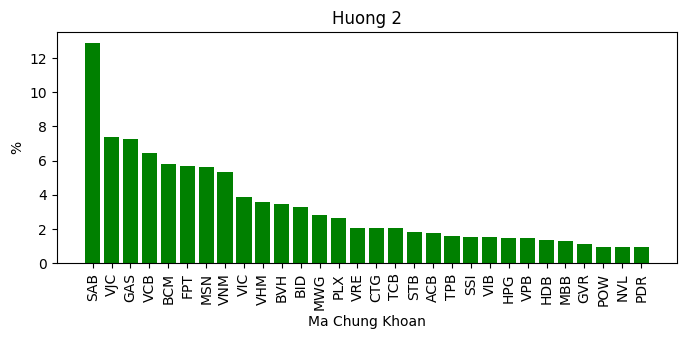

In [ ]:
plt.figure(figsize=(8,3))
plt.bar(ma_nmf.index, ma_nmf['Contribution'], color = ['g' if x>0 else 'r' for x in ma_nmf['Contribution']])
plt.xlabel('Ma Chung Khoan')
plt.ylabel('%')
plt.xticks(rotation = 90)
plt.title('Huong 2')
plt.show()

SAB tiếp tục dẫn đầu và nhận xét như trên hướng 1, chưa có sự tương đồng rõ nét với xu hướng tổng thể thị trường.

**Hướng 3: Non-negative PCA (in R)** 

About non-negative PCA: https://web.stanford.edu/~montanar/RESEARCH/FILEPAP/nmf.pdf

Thuật toán được chọn: nsprcomp là non-negative PCA được cài được trong R, tham khảo tại: https://cran.r-project.org/web/packages/nsprcomp/nsprcomp.pdf

In [ ]:
component = nsprcomp(new_total_buy_price_std, ncomp = 3, nneg = True)[1]
print(component)

             PC1         PC2        PC3
 [1,] 0.14272958 0.030451895 0.01617292
 [2,] 0.00000000 0.249406760 0.00000000
 [3,] 0.00000000 0.228638713 0.00000000
 [4,] 0.00000000 0.157148427 0.28707962
 [5,] 0.18243649 0.026430591 0.00000000
 [6,] 0.15573753 0.009675457 0.03400492
 [7,] 0.00000000 0.230033603 0.16485723
 [8,] 0.18221716 0.000000000 0.08032442
 [9,] 0.18215083 0.000000000 0.02391887
[10,] 0.13412356 0.066013995 0.00000000
[11,] 0.18445932 0.021369074 0.00000000
[12,] 0.00000000 0.000000000 0.49770997
[13,] 0.14922004 0.000000000 0.17030823
[14,] 0.14791382 0.000000000 0.02692735
[15,] 0.16521739 0.000000000 0.04205354
[16,] 0.16766377 0.042025358 0.00000000
[17,] 0.11347501 0.000000000 0.20941158
[18,] 0.00000000 0.233310459 0.11129577
[19,] 0.18607668 0.006651249 0.00000000
[20,] 0.17544740 0.027762538 0.00000000
[21,] 0.18170875 0.000000000 0.07651136
[22,] 0.15641768 0.000000000 0.14326575
[23,] 0.07109531 0.198930253 0.00000000
[24,] 0.17563081 0.004178730 0.00000000


Em in ra 3 PC đầu để quan sát nhiều hơn về các components, các feature gốc có hệ số trong PC1 bằng 0 không hẳn là không quan trọng (ở các PC tiếp theo có hệ số dương) mà là do khi chỉ xét PC1 ta cho tầm quan trọng của nó bằng 0.

In [ ]:
PC = pd.DataFrame(component)
PC1 = PC[:60]
PC1[0]

0     0.142730
1     0.000000
2     0.000000
3     0.000000
4     0.182436
5     0.155738
6     0.000000
7     0.182217
8     0.182151
9     0.134124
10    0.184459
11    0.000000
12    0.149220
13    0.147914
14    0.165217
15    0.167664
16    0.113475
17    0.000000
18    0.186077
19    0.175447
20    0.181709
21    0.156418
22    0.071095
23    0.175631
24    0.111857
25    0.109052
26    0.000000
27    0.000000
28    0.082878
29    0.034750
30    0.142598
31    0.000000
32    0.000000
33    0.000000
34    0.182427
35    0.155529
36    0.000000
37    0.182210
38    0.182178
39    0.134116
40    0.184476
41    0.000000
42    0.149174
43    0.147869
44    0.165191
45    0.168050
46    0.113431
47    0.000000
48    0.185981
49    0.175448
50    0.181818
51    0.156447
52    0.071370
53    0.175565
54    0.111831
55    0.109027
56    0.000000
57    0.000000
58    0.082727
59    0.034787
Name: 0, dtype: float64

In [ ]:
ma_R = dict()
i=0
for ma, feature in dd.items():
  ma_R[ma] = (PC1[0][i] +PC1[0][i+30])/sum(PC1[0])*100
  i=i+1

ma_R = pd.DataFrame.from_dict([ma_R]).T.rename(columns= {0:'Contribution'}).sort_values(by ='Contribution', ascending =False)
ma_R.T

SSI       MBB       CTG       GVR       HDB       TCB  \
Contribution  5.827514  5.778604  5.714823  5.707984  5.706445  5.693894   

                   VHM       STB       PLX       PDR  ...      VCB       VRE  \
Contribution  5.500755  5.496041  5.258252  5.175163  ...  2.23142  1.089157   

              BCM  SAB  MSN  GAS  BVH  BID  VJC  VNM  
Contribution  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 30 columns]

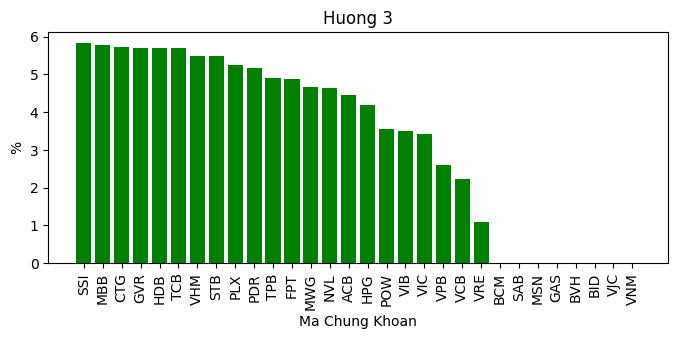

In [ ]:
plt.figure(figsize=(8,3))
plt.bar(ma_R.index, ma_R['Contribution'], color = ['g' if x>0 else 'r' for x in ma_R['Contribution']])
plt.xlabel('Ma Chung Khoan')
plt.ylabel('%')
plt.xticks(rotation = 90)
plt.title('Huong 3')
plt.show()

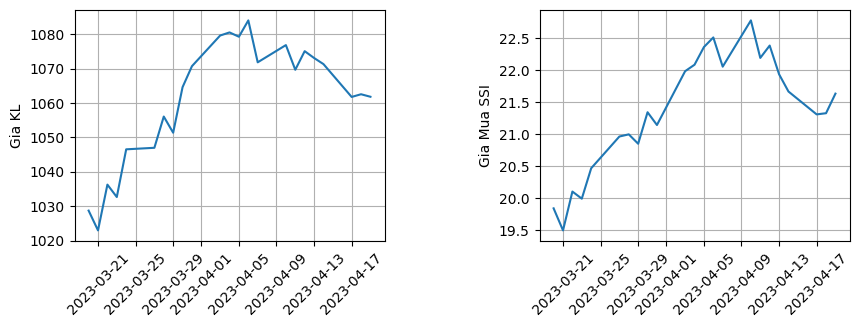

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10,3))
fig.subplots_adjust(wspace=0.5)

axs[0].plot(date_df['Gia KL'])
axs[0].grid()
axs[0].set_ylabel('Gia KL')
axs[0].tick_params(axis='x', labelrotation=45)

axs[1].plot(date_df['mua_gia_1SSI'])
axs[1].grid()
axs[1].set_ylabel('Gia Mua SSI')
axs[1].tick_params(axis='x', labelrotation=45)

plt.show()

Yeah! Ở đây ta đã thấy sự tương đồng rõ nét hơn so với 2 hướng tiếp cận trước, có vẻ như SSI có contribute cao thật sự!

**Lựa chọn hướng giải quyết: Hướng 3 non-negative PCA**

Lý do: Vì PCA là thuật toán quen thuộc và chúng em đã được giảng dạy bài bản trên lớp nên hiểu sâu hơn về ý nghĩa của nó. Kết hợp với việc nâng cao tính giải thích bằng thuật toán cải tiến non-negative PCA, hướng 3 đã đem lại niềm tin nhiều hơn cho chúng em khi thực hiện.

### Date DataFrame

In [ ]:
new_date_buy_price_std = StandardScaler().fit_transform(add_time_series_property(date_buy_price))

**Hướng 3**

In [ ]:
component = nsprcomp(new_date_buy_price_std, ncomp = 1, nneg = True)[1]
PC = pd.DataFrame(component)
ma_df_R = dict()
i=0
for ma, feature in dd.items():
  ma_df_R[ma] = (PC[0][i] +PC[0][i+30])/sum(PC[0])*100
  i=i+1

ma_df_R = pd.DataFrame.from_dict([ma_df_R]).T.rename(columns= {0:'Contribution'}).sort_values(by ='Contribution', ascending =False)
ma_df_R.T

MBB      SSI       HDB       FPT       CTG       TCB  \
Contribution  5.742671  5.70598  5.698524  5.679616  5.650095  5.631332   

                   ACB      GVR       PLX       VHM  ...       VPB       VRE  \
Contribution  5.586032  5.47024  5.400522  5.385884  ...  1.925747  0.547651   

              BCM  SAB  BVH  GAS  BID  MSN  VJC  VNM  
Contribution  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 30 columns]

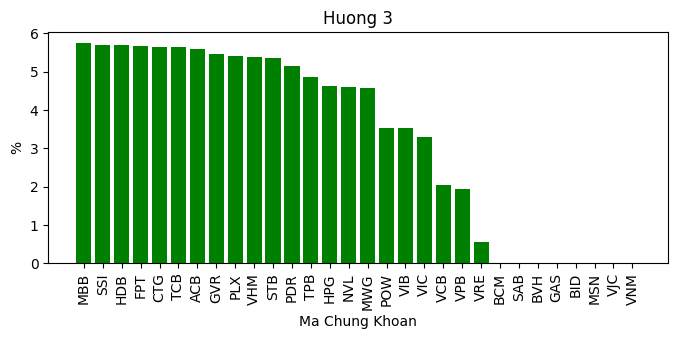

In [ ]:
plt.figure(figsize=(8,3))
plt.bar(ma_df_R.index, ma_df_R['Contribution'], color = ['g' if x>0 else 'r' for x in ma_df_R['Contribution']])
plt.xlabel('Ma Chung Khoan')
plt.ylabel('%')
plt.xticks(rotation = 90)
plt.title('Huong 3')
plt.show()

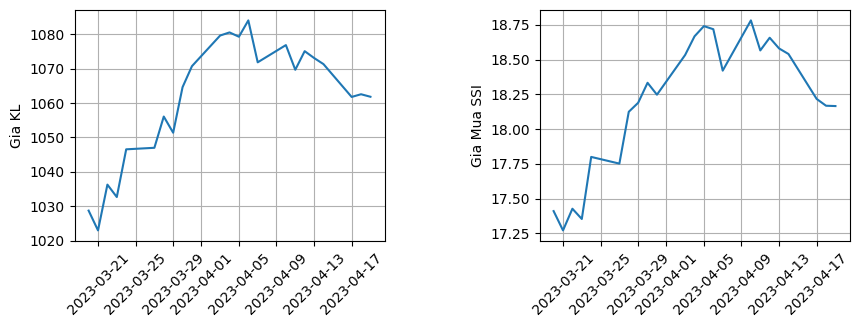

In [ ]:
fig, axs = plt.subplots(1, 2, figsize = (10,3))
fig.subplots_adjust(wspace=0.5)

axs[0].plot(date_df['Gia KL'])
axs[0].grid()
axs[0].set_ylabel('Gia KL')
axs[0].tick_params(axis='x', labelrotation=45)

axs[1].plot(date_df['mua_gia_1MBB'])
axs[1].grid()
axs[1].set_ylabel('Gia Mua SSI')
axs[1].tick_params(axis='x', labelrotation=45)

plt.show()

Ta thấy kết quả khá giống khi chạy với **Total DataFrame**, do đó ở các nhóm khác có thể sử dụng 1 trong 2 thay vì thử nghiệm hết cả hai.

## Sell Price

Sử dụng hướng tiếp cận số 3 và Date DataFrame

In [ ]:
new_date_sell_price_std = StandardScaler().fit_transform(add_time_series_property(date_sell_price))

In [ ]:
component = nsprcomp(new_date_sell_price_std, ncomp = 1, nneg = True)[1]
PC = pd.DataFrame(component)
ma_df_R = dict()
i=0
for ma, feature in dd.items():
  ma_df_R[ma] = (PC[0][i] +PC[0][i+30])/sum(PC[0])*100
  i=i+1

ma_df_R = pd.DataFrame.from_dict([ma_df_R]).T.rename(columns= {0:'Contribution'}).sort_values(by ='Contribution', ascending =False)
ma_df_R.T

MBB       SSI      HDB       FPT       CTG       TCB  \
Contribution  5.754563  5.716371  5.70141  5.697835  5.648834  5.632241   

                   ACB       GVR       VHM       PLX  ...       VPB       VRE  \
Contribution  5.580883  5.474667  5.405812  5.397776  ...  1.959238  0.469176   

              MSN  BID  GAS  SAB  VJC  VNM  BCM  BVH  
Contribution  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 30 columns]

Nhận xét: Khi tính tầm quan trọng bằng cách tiếp cận như trên, tầm quan trọng của các mã ở giá bán so với giá mua có khá nhiều biến động, điển hình là việc "leo rank" của MBB và SSI ở giá bán.

<Axes: xlabel='_time'>

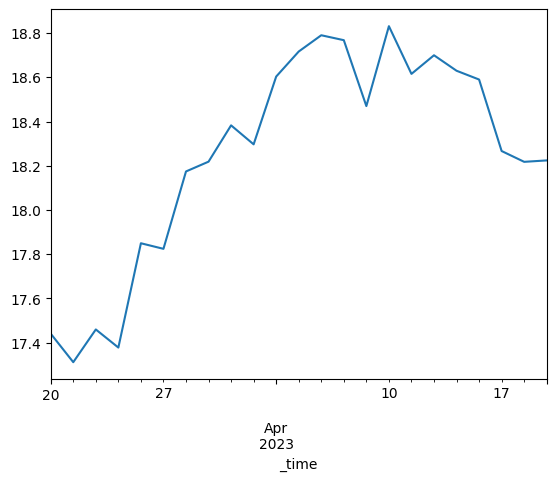

In [ ]:
date_df['ban_gia_1MBB'].plot()

Plot lần này cũng có xu hướng tương đồng với Gia KL.

##Buy Weight

In [ ]:
new_date_buy_weight_std = StandardScaler().fit_transform(add_time_series_property(date_buy_weight))

In [ ]:
component = nsprcomp(new_date_buy_weight_std, ncomp = 1, nneg = True)[1]
PC = pd.DataFrame(component)
ma_df_R = dict()
i=0
for ma, feature in dd.items():
  ma_df_R[ma] = (PC[0][i] +PC[0][i+30])/sum(PC[0])*100
  i=i+1

ma_df_R = pd.DataFrame.from_dict([ma_df_R]).T.rename(columns= {0:'Contribution'}).sort_values(by ='Contribution', ascending =False)
ma_df_R.T

CTG       GVR       TCB       PDR       GAS       BID  \
Contribution  6.224944  6.181736  6.034058  5.899736  5.459128  5.131322   

                   BCM       MBB       VNM       VIB  ...       POW       VCB  \
Contribution  5.052837  4.824208  4.791395  4.754128  ...  2.098626  1.577003   

                   PLX       BVH       VIC       SAB       FPT       VPB  VJC  \
Contribution  1.401762  1.269345  1.024298  0.586469  0.472805  0.075929  0.0   

              VRE  
Contribution  0.0  

[1 rows x 30 columns]

Đã có nhiều sự thay đổi về thứ hạng và phần trăm đóng góp của các mã khi ta xét khía cạnh khối lượng mua.

<Axes: xlabel='_time'>

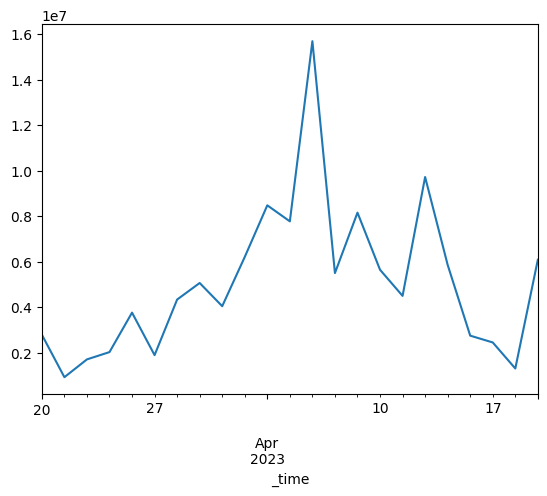

In [ ]:
date_buy_weight['mua_kl_1CTG'].plot()

##Sell Weight

In [ ]:
new_date_sell_weight_std = StandardScaler().fit_transform(add_time_series_property(date_sell_weight))

In [ ]:
component = nsprcomp(new_date_sell_weight_std, ncomp = 1, nneg = True)[1]
PC = pd.DataFrame(component)
ma_df_R = dict()
i=0
for ma, feature in dd.items():
  ma_df_R[ma] = (PC[0][i] +PC[0][i+30])/sum(PC[0])*100
  i=i+1

ma_df_R = pd.DataFrame.from_dict([ma_df_R]).T.rename(columns= {0:'Contribution'}).sort_values(by ='Contribution', ascending =False)
ma_df_R.T

VIB       TCB       FPT       VIC       HPG       CTG  \
Contribution  6.642363  5.908062  5.796333  5.621152  5.330301  5.061001   

                   MBB       GVR       MWG       SSI  ...       VNM       POW  \
Contribution  5.050995  5.012822  4.936288  4.327402  ...  2.416012  2.406236   

                   VJC      BVH      VPB       ACB       BID  VCB  SAB  PLX  
Contribution  2.202879  1.71506  1.58927  1.517833  1.266435  0.0  0.0  0.0  

[1 rows x 30 columns]

Đã có nhiều sự thay đổi về thứ hạng và phần trăm đóng góp của các mã khi ta xét khía cạnh khối lượng bán. Sự khác nhau ở khối lượng mua và bán nhiều hơn giá mua và giá bán.

<Axes: xlabel='_time'>

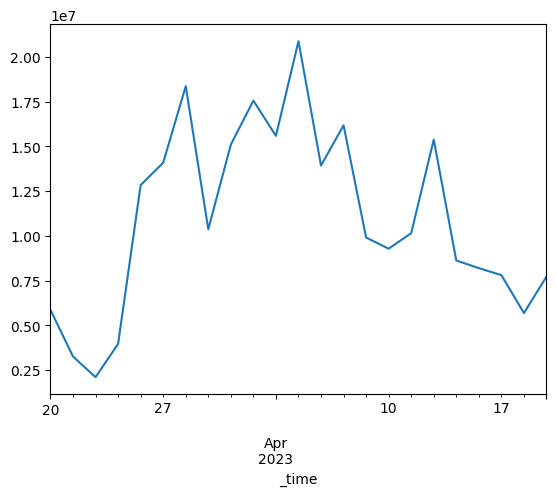

In [ ]:
date_sell_weight['ban_kl_1VIB'].plot()

# Clustering

**Sử dụng KMeans để phân cụm và các Metric để chọn k-clusters tốt nhất là:**

+ ***Elbow Method***: Chọn vị trí cùi chỏ "elbow" là số cụm - k

+ **[*Silhouette Score*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html )**:  Tính trung bình khoảng cách giữa điểm đó và tâm cụm mà nó thuộc về và  tính trung bình khoảng cách giữa điểm đó và tâm cụm gần nó nhất. Và hệ số được tính theo công thức $\frac{b-a}{max(a,b)}$. Kết quả càng gần 1 thì càng tốt, ngược lại kết quả càng gần -1 thì càng xấu.



In [ ]:
def kmeans(df):
    inertia = []
    silhouette = []
    for k in range(2,10):
      # Building and fitting the model
      kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit(df)
      labels = kmeans.fit_predict(df)
      inertia.append(kmeans.inertia_)
      cluster_labels = kmeans.labels_
      silhouette.append(silhouette_score(df, labels))
    return inertia, silhouette

def visualizeScore(inertia, silhouette):
    fig, axs = plt.subplots(1, 2, figsize = (10,3))
    fig.subplots_adjust(wspace=0.5)
    axs[0].plot(range(2,10), inertia, 'bx-')
    axs[0].grid()
    axs[0].set_xlabel('Number of clusters')
    axs[0].set_ylabel('Sum of squared Distances')

    axs[1].plot(range(2,10), silhouette, 'bx-')
    axs[1].grid()
    axs[1].set_xlabel('Number of clusters')
    axs[1].set_ylabel('Silhouette Score')
    plt.show()
  
def predKmeans(df, k):
    labels = KMeans(n_clusters = k, init='k-means++', max_iter=300, n_init=10, random_state=0).fit_predict(df)
    col = list(mcolors.BASE_COLORS.keys())
    cluster = pd.DataFrame()
    cluster['Stock'] = df.T.columns
    cluster['Label'] = labels
    cluster['Color'] = list(map(lambda x: col[x] , cluster['Label']))
    cluster = cluster.sort_values(by = 'Label')
    display(cluster)
    display(cluster.groupby('Label')['Stock'].count())
    return cluster

def visualizeLabel(cluster):
    fig, axs = plt.subplots(15, 2, sharex=True, figsize = (16,50))
    fig.subplots_adjust(hspace=0.2)
    fig.subplots_adjust(wspace=0.5)

    for i,(col) in enumerate(cluster['Stock']):
        axs[int(i/2), i%2].plot(total_df[col].rolling(window = 360).mean(), label= str(cluster.iloc[i,1])+ ' - ' + col, color= cluster.iloc[i,2])
        axs[int(i/2), i%2].grid()
        axs[int(i/2), i%2].legend(loc='upper left', bbox_to_anchor=(1.02, 1.0))
        axs[int(i/2), i%2].tick_params(rotation=45)
    plt.show() 

- Về giá mua/bán thì sau khi tìm hiểu và chạy thử thì nhóm chúng em quyết định cluster các mã giá mua/bán để tìm xu hướng về chứng khoán của các công ty (xu hướng ở đây nghĩa là các công ty nào có giá mua/bán được visualize ở các đồ thị có hình dạng giống nhau)


## Buy Price

### Total DataFrame

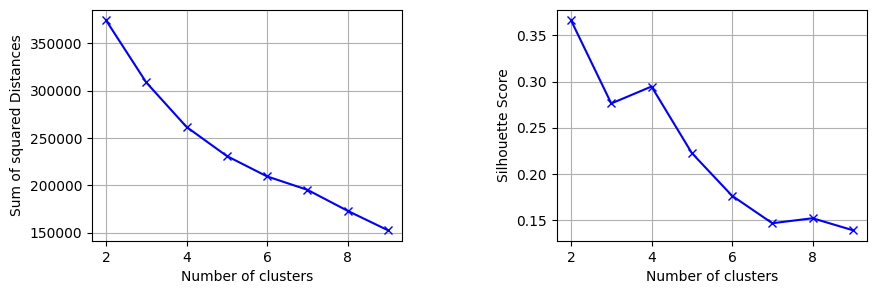

In [ ]:
visualizeScore(kmeans(total_buy_price_std.T)[0], kmeans(total_buy_price_std.T)[1])

**Choose k = 5 and Visualization**

Stock  Label Color
1   mua_gia_1BCM      0     b
2   mua_gia_1BID      0     b
3   mua_gia_1BVH      0     b
27  mua_gia_1VNM      0     b
6   mua_gia_1GAS      0     b
17  mua_gia_1SAB      0     b
26  mua_gia_1VJC      0     b
14  mua_gia_1PDR      1     g
19  mua_gia_1STB      1     g
18  mua_gia_1SSI      1     g
23  mua_gia_1VHM      1     g
15  mua_gia_1PLX      1     g
13  mua_gia_1NVL      1     g
10  mua_gia_1MBB      1     g
20  mua_gia_1TCB      1     g
8   mua_gia_1HDB      1     g
7   mua_gia_1GVR      1     g
4   mua_gia_1CTG      1     g
12  mua_gia_1MWG      1     g
21  mua_gia_1TPB      1     g
24  mua_gia_1VIB      2     r
25  mua_gia_1VIC      2     r
29  mua_gia_1VRE      2     r
28  mua_gia_1VPB      2     r
22  mua_gia_1VCB      2     r
16  mua_gia_1POW      3     c
9   mua_gia_1HPG      3     c
5   mua_gia_1FPT      3     c
0   mua_gia_1ACB      3     c
11  mua_gia_1MSN      4     m

Label
0     7
1    13
2     5
3     4
4     1
Name: Stock, dtype: int64

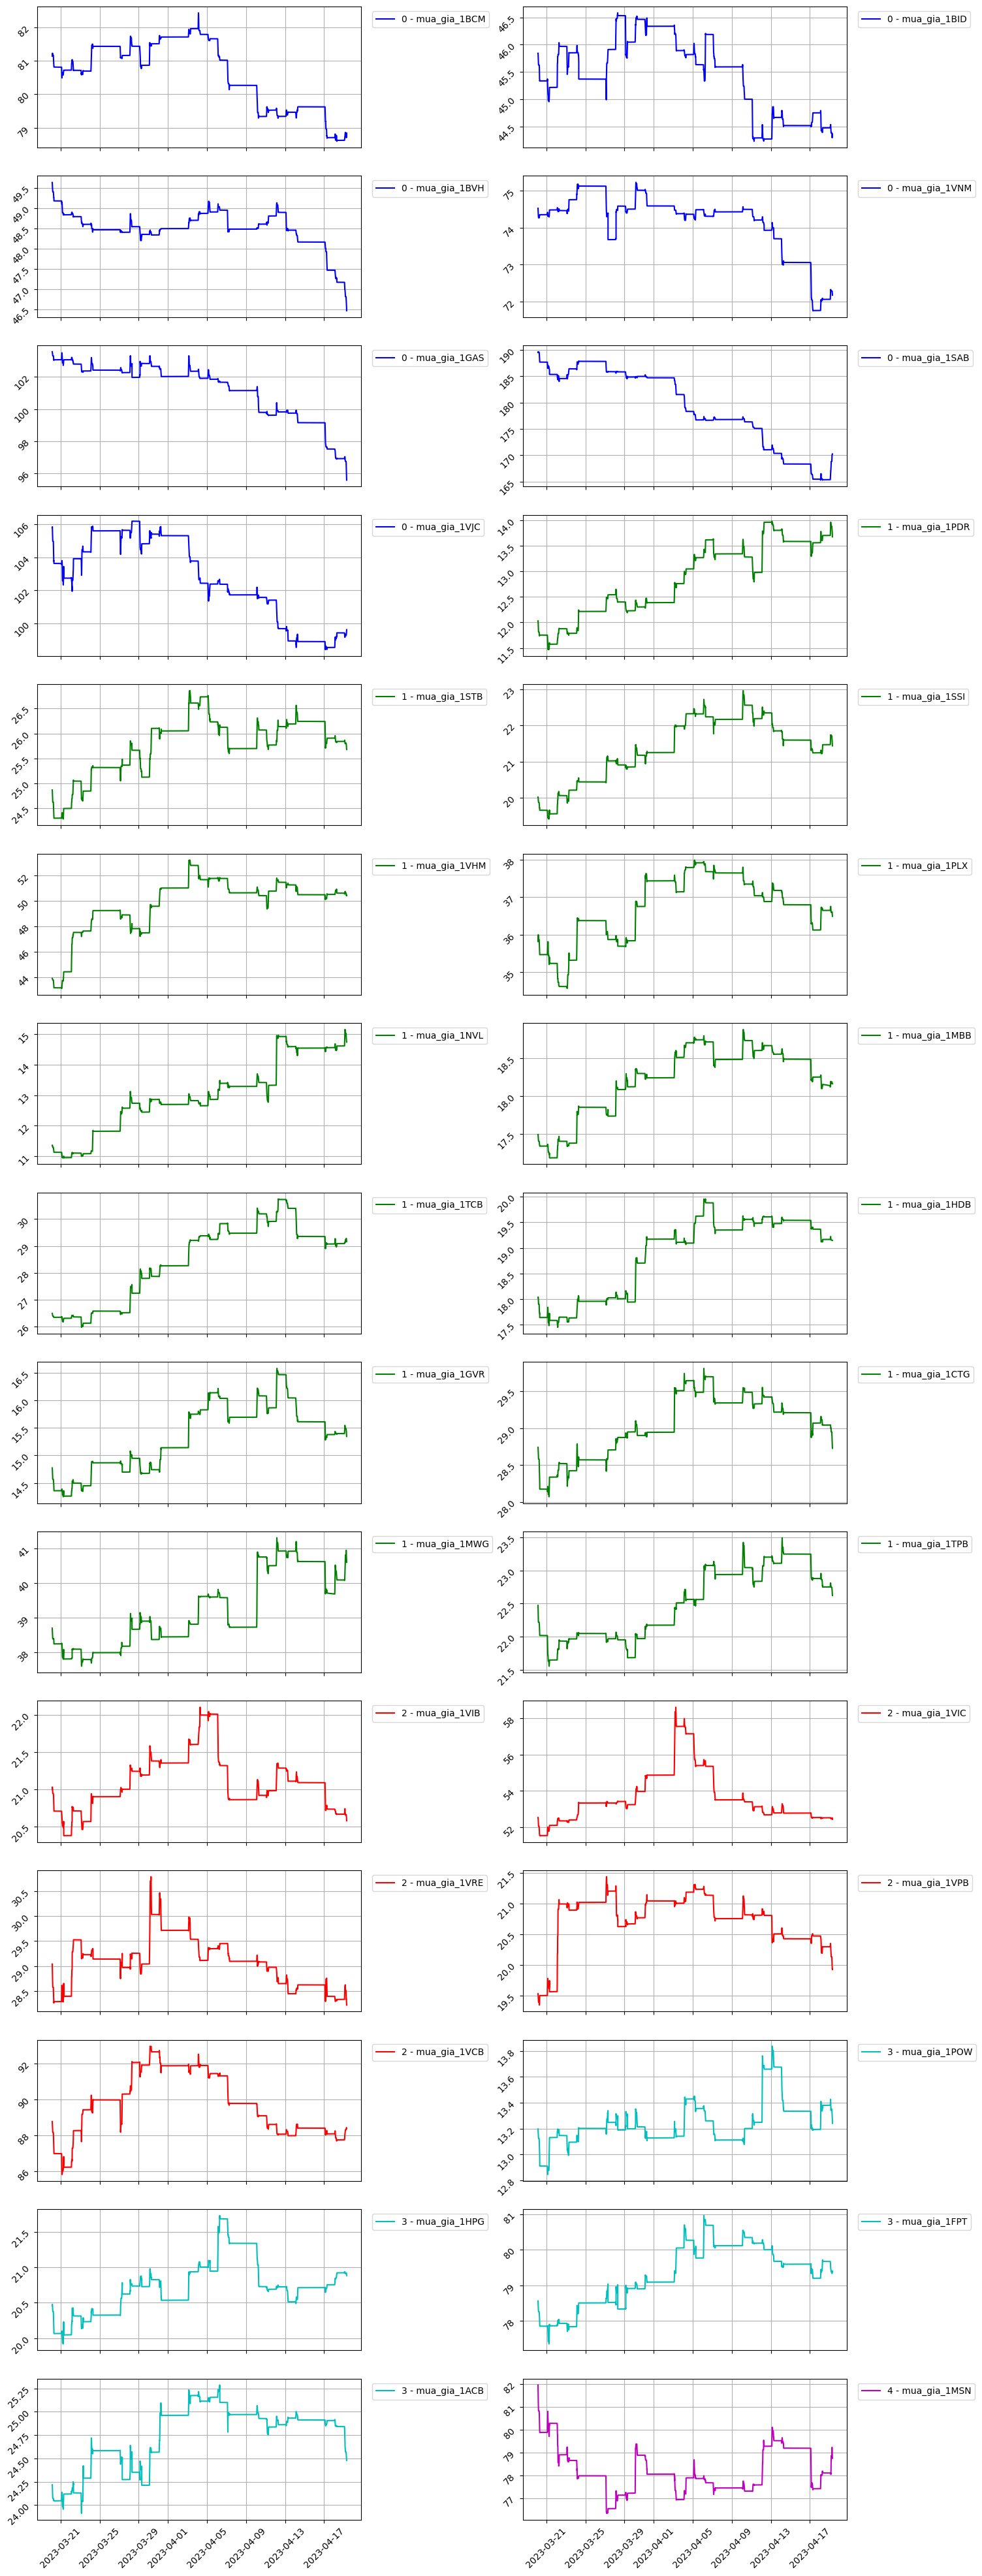

In [ ]:
visualizeLabel(predKmeans(total_buy_price_std.T, 5))

### Date DataFrame

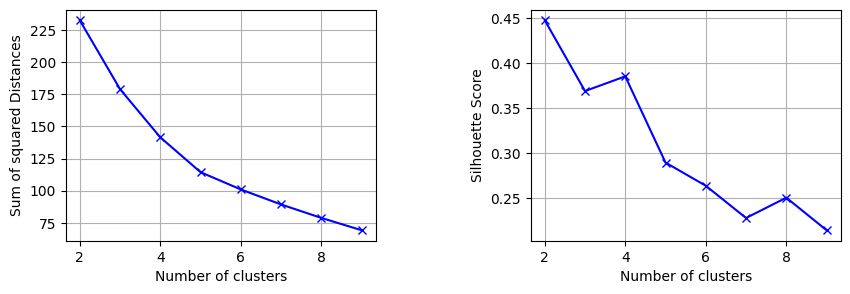

In [ ]:
visualizeScore(kmeans(date_buy_price_std.T)[0], kmeans(date_buy_price_std.T)[1])

**Choose k = 5 and Visualization**

Stock  Label Color
29  mua_gia_1VRE      0     b
25  mua_gia_1VIC      0     b
24  mua_gia_1VIB      0     b
22  mua_gia_1VCB      0     b
28  mua_gia_1VPB      0     b
23  mua_gia_1VHM      1     g
20  mua_gia_1TCB      1     g
19  mua_gia_1STB      1     g
18  mua_gia_1SSI      1     g
15  mua_gia_1PLX      1     g
0   mua_gia_1ACB      1     g
5   mua_gia_1FPT      1     g
4   mua_gia_1CTG      1     g
10  mua_gia_1MBB      1     g
9   mua_gia_1HPG      1     g
8   mua_gia_1HDB      1     g
7   mua_gia_1GVR      1     g
11  mua_gia_1MSN      2     r
6   mua_gia_1GAS      3     c
3   mua_gia_1BVH      3     c
2   mua_gia_1BID      3     c
1   mua_gia_1BCM      3     c
26  mua_gia_1VJC      3     c
27  mua_gia_1VNM      3     c
17  mua_gia_1SAB      3     c
16  mua_gia_1POW      4     m
13  mua_gia_1NVL      4     m
21  mua_gia_1TPB      4     m
12  mua_gia_1MWG      4     m
14  mua_gia_1PDR      4     m

Label
0     5
1    12
2     1
3     7
4     5
Name: Stock, dtype: int64

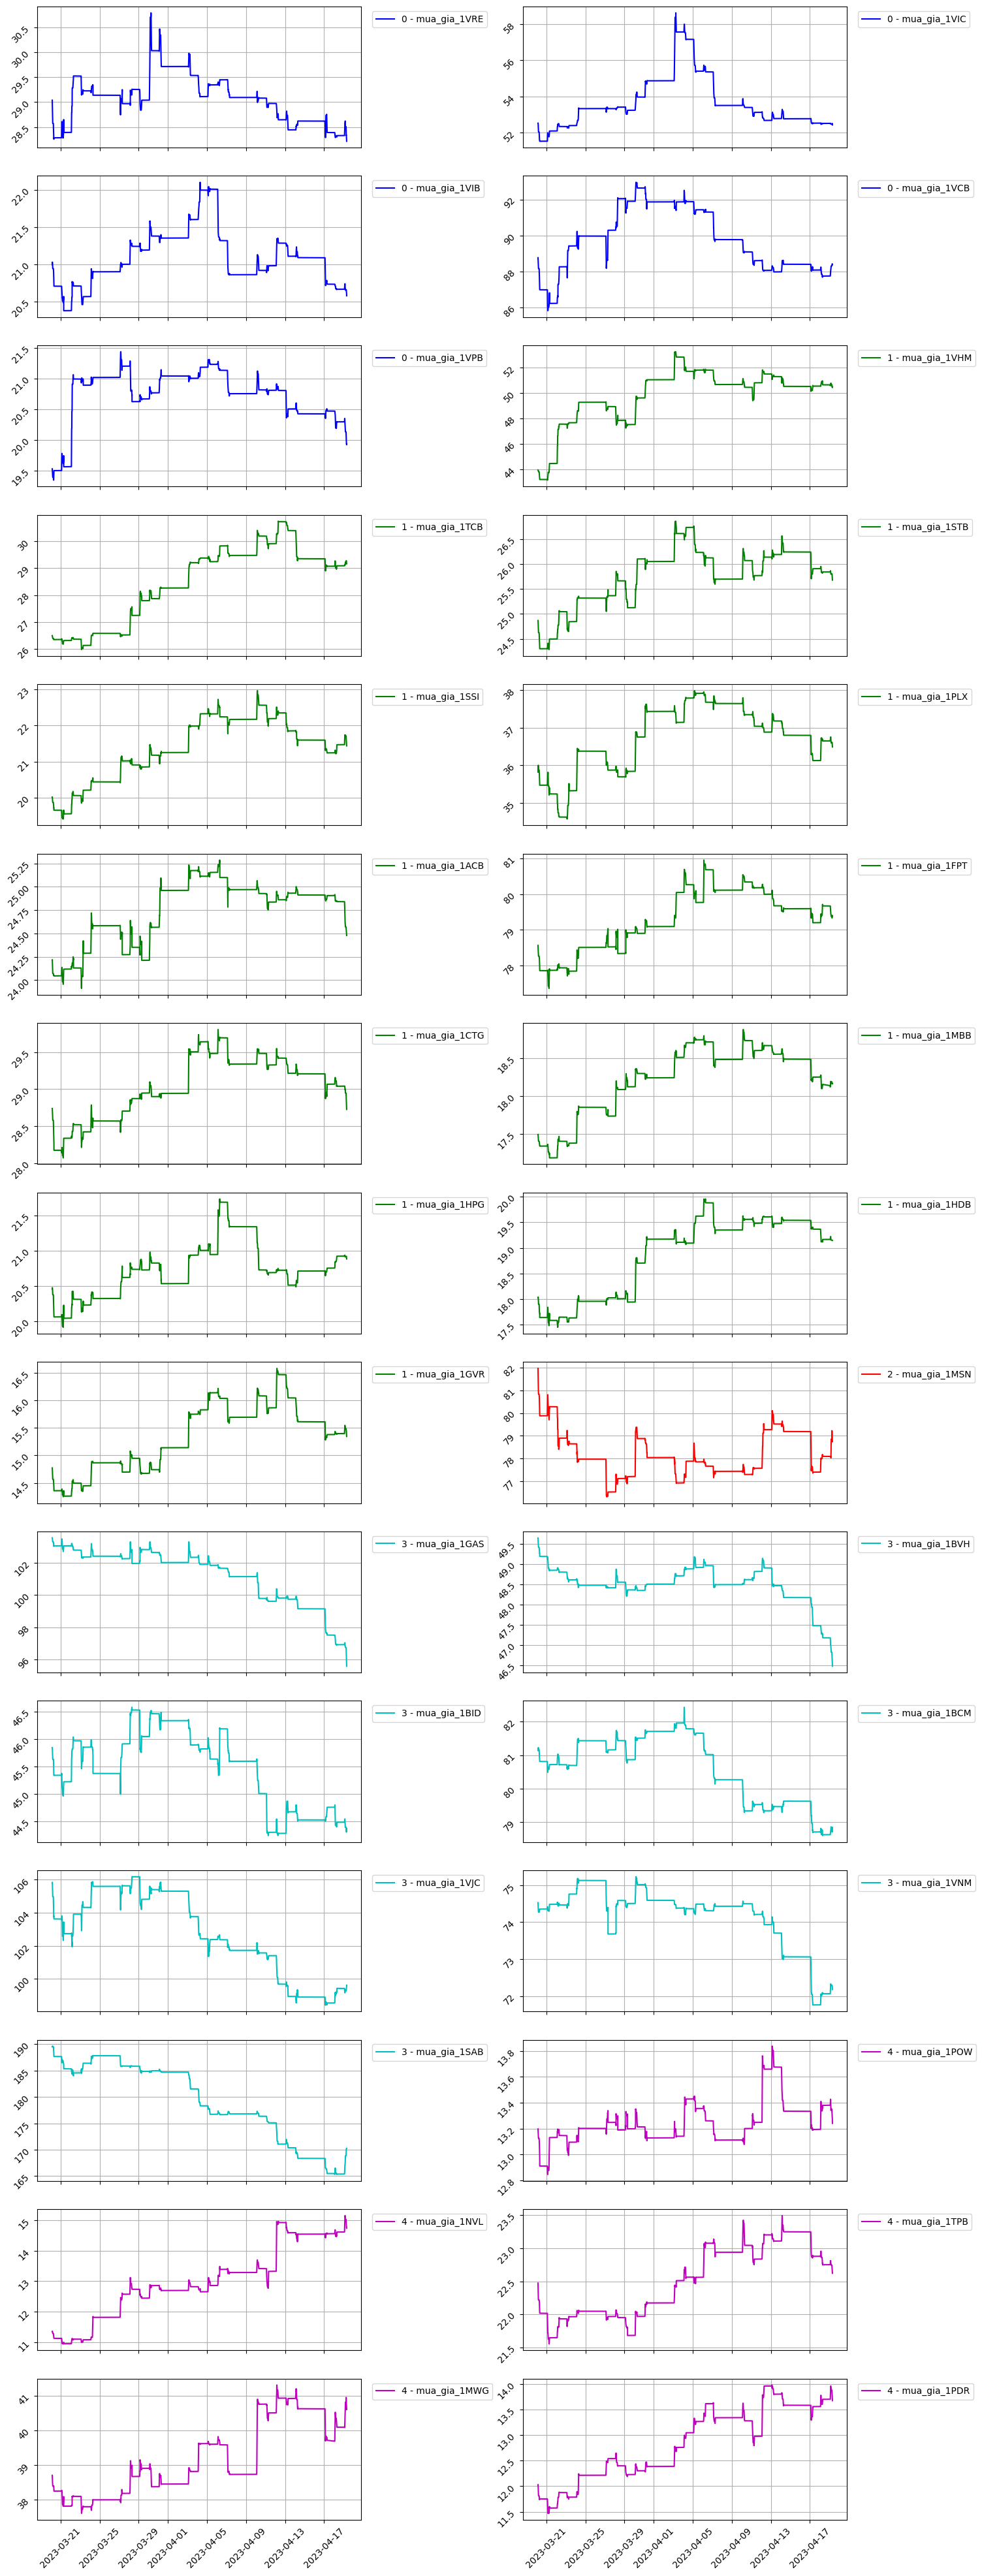

In [ ]:
visualizeLabel(predKmeans(date_buy_price_std.T, 5))

- Tạo DataFrame cho các cluster trong buy price và hiển thị số lượng trong từng cluster.

- Bên trên là visualize của nhóm chúng em với cách phân cụm theo xu hướng của các mã giá mua.


### Dynamic Time Warping

[Dynamic Time Warping](https://tslearn.readthedocs.io/en/stable/auto_examples/clustering/plot_kmeans.html): Thuật toán này áp dụng KMeans Clustering cho Time-Series.

In [ ]:
def DTW(df, k):
  """
  DTW - Kmeans
  ------------------
  df - DataFrame need to clustering (by row)
  k - Number of Clusters
  """

  dba_km = TimeSeriesKMeans(n_clusters=k,
                            n_init=5,
                            metric="dtw",
                            verbose=False,
                            max_iter_barycenter=10,
                            random_state=0)
  return dba_km.fit_predict(df), dba_km.cluster_centers_

def VisualizeDTW(df, k, labels, centers):
  plt.figure(figsize=(10,10))
  for clus in range(k):
      plt.subplot(4, 2, clus+1)
      for x in df.values[labels == clus]:
          plt.plot(x, "k-", alpha=.2)
      plt.plot(centers[clus], "r-")
      plt.xlim(0, df.shape[1])
      plt.ylim(-4, 4)
      plt.text(0.55, 0.85,'Cluster %d' % (clus + 1),
              transform=plt.gca().transAxes)
      if clus == 1:
          plt.title("DBA $k$-means")
          
  plt.tight_layout()
  plt.show()

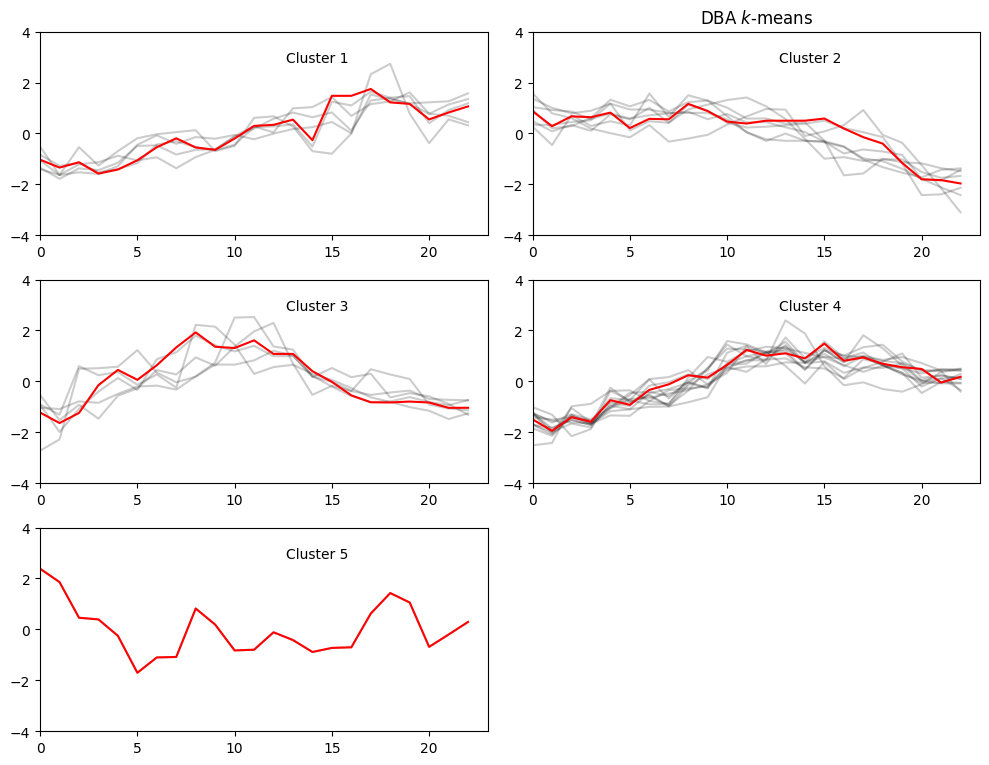

In [ ]:
labels, centers = DTW(date_buy_price_std.T, 5)[0], DTW(date_buy_price_std.T, 5)[1]
VisualizeDTW(date_buy_price_std.T, 5, labels, centers)

Ta có thể thấy áp dụng KMeans hay Dynamic Time Warping để phát hiện các xu hướng tăng/giảm của giá mua theo thời gian của các Mã CK chung một nhóm là tương tự nhau. 

Đây có thể xem là một kết quả phân cụm khá tốt khi ta có thể chi ra đặc trưng của các cụm như sau (Thời gian: Từ 20-03-2023 đến 19-04-2023):
1. Cluster 1 có xu hướng chung là tăng theo thời gian
2. Cluster 2 có xu hướng chung là giai đoạn ban đầu đi ngang (không đổi) và có xu hướng đi xuống một xíu ở giai đoạn sau
3. Cluster 3 có xu hướng ban đầu tăng giá khá mạnh và đạt đỉnh sau đó hạ giá
4. Cluster 4 có xu hướng tăng giá đều ở 2/3 khoảng thời gian và giảm nhẹ ở giai đoạn cuối
5. Cluster 5 có xu hướng biến động rất mạnh khi tăng và hạ giá liên tục

**Với giá mua và giá bán trên thị trường chứng khoán thường có xu hướng tác động qua lại lẫn nhau, nên với giá bán nhóm chúng em áp dụng cluster tương tự như với giá mua.**

## Sell Price

Ta nhận thấy ở phần **Buy Price** khi sử dụng Total DF hay Date DF đều trả về kết quả cluster như nhau nên ta chỉ cần sử dụng một DF và nhóm chúng em chọn Date DF để visualize hiệu quả hơn.

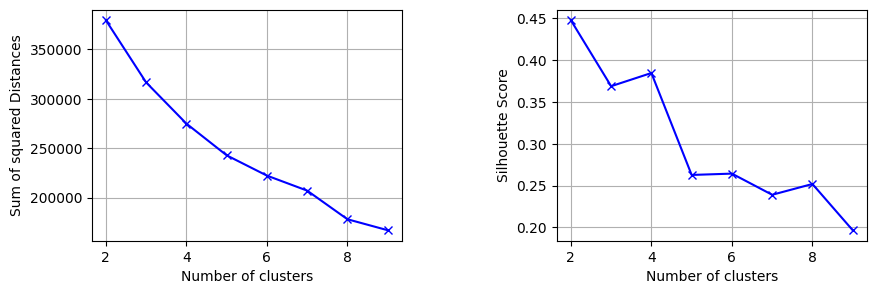

In [ ]:
visualizeScore(kmeans(total_sell_price_std.T)[0], kmeans(date_sell_price_std.T)[1])

**Choose k = 5 and Visualization**

Stock  Label Color
0   ban_gia_1ACB      0     b
23  ban_gia_1VHM      0     b
4   ban_gia_1CTG      0     b
5   ban_gia_1FPT      0     b
19  ban_gia_1STB      0     b
18  ban_gia_1SSI      0     b
8   ban_gia_1HDB      0     b
9   ban_gia_1HPG      0     b
10  ban_gia_1MBB      0     b
15  ban_gia_1PLX      0     b
27  ban_gia_1VNM      1     g
26  ban_gia_1VJC      1     g
17  ban_gia_1SAB      1     g
29  ban_gia_1VRE      1     g
6   ban_gia_1GAS      1     g
3   ban_gia_1BVH      1     g
2   ban_gia_1BID      1     g
1   ban_gia_1BCM      1     g
12  ban_gia_1MWG      2     r
16  ban_gia_1POW      2     r
7   ban_gia_1GVR      2     r
20  ban_gia_1TCB      2     r
21  ban_gia_1TPB      2     r
13  ban_gia_1NVL      2     r
14  ban_gia_1PDR      2     r
28  ban_gia_1VPB      3     c
22  ban_gia_1VCB      3     c
24  ban_gia_1VIB      3     c
25  ban_gia_1VIC      3     c
11  ban_gia_1MSN      4     m

Label
0    10
1     8
2     7
3     4
4     1
Name: Stock, dtype: int64

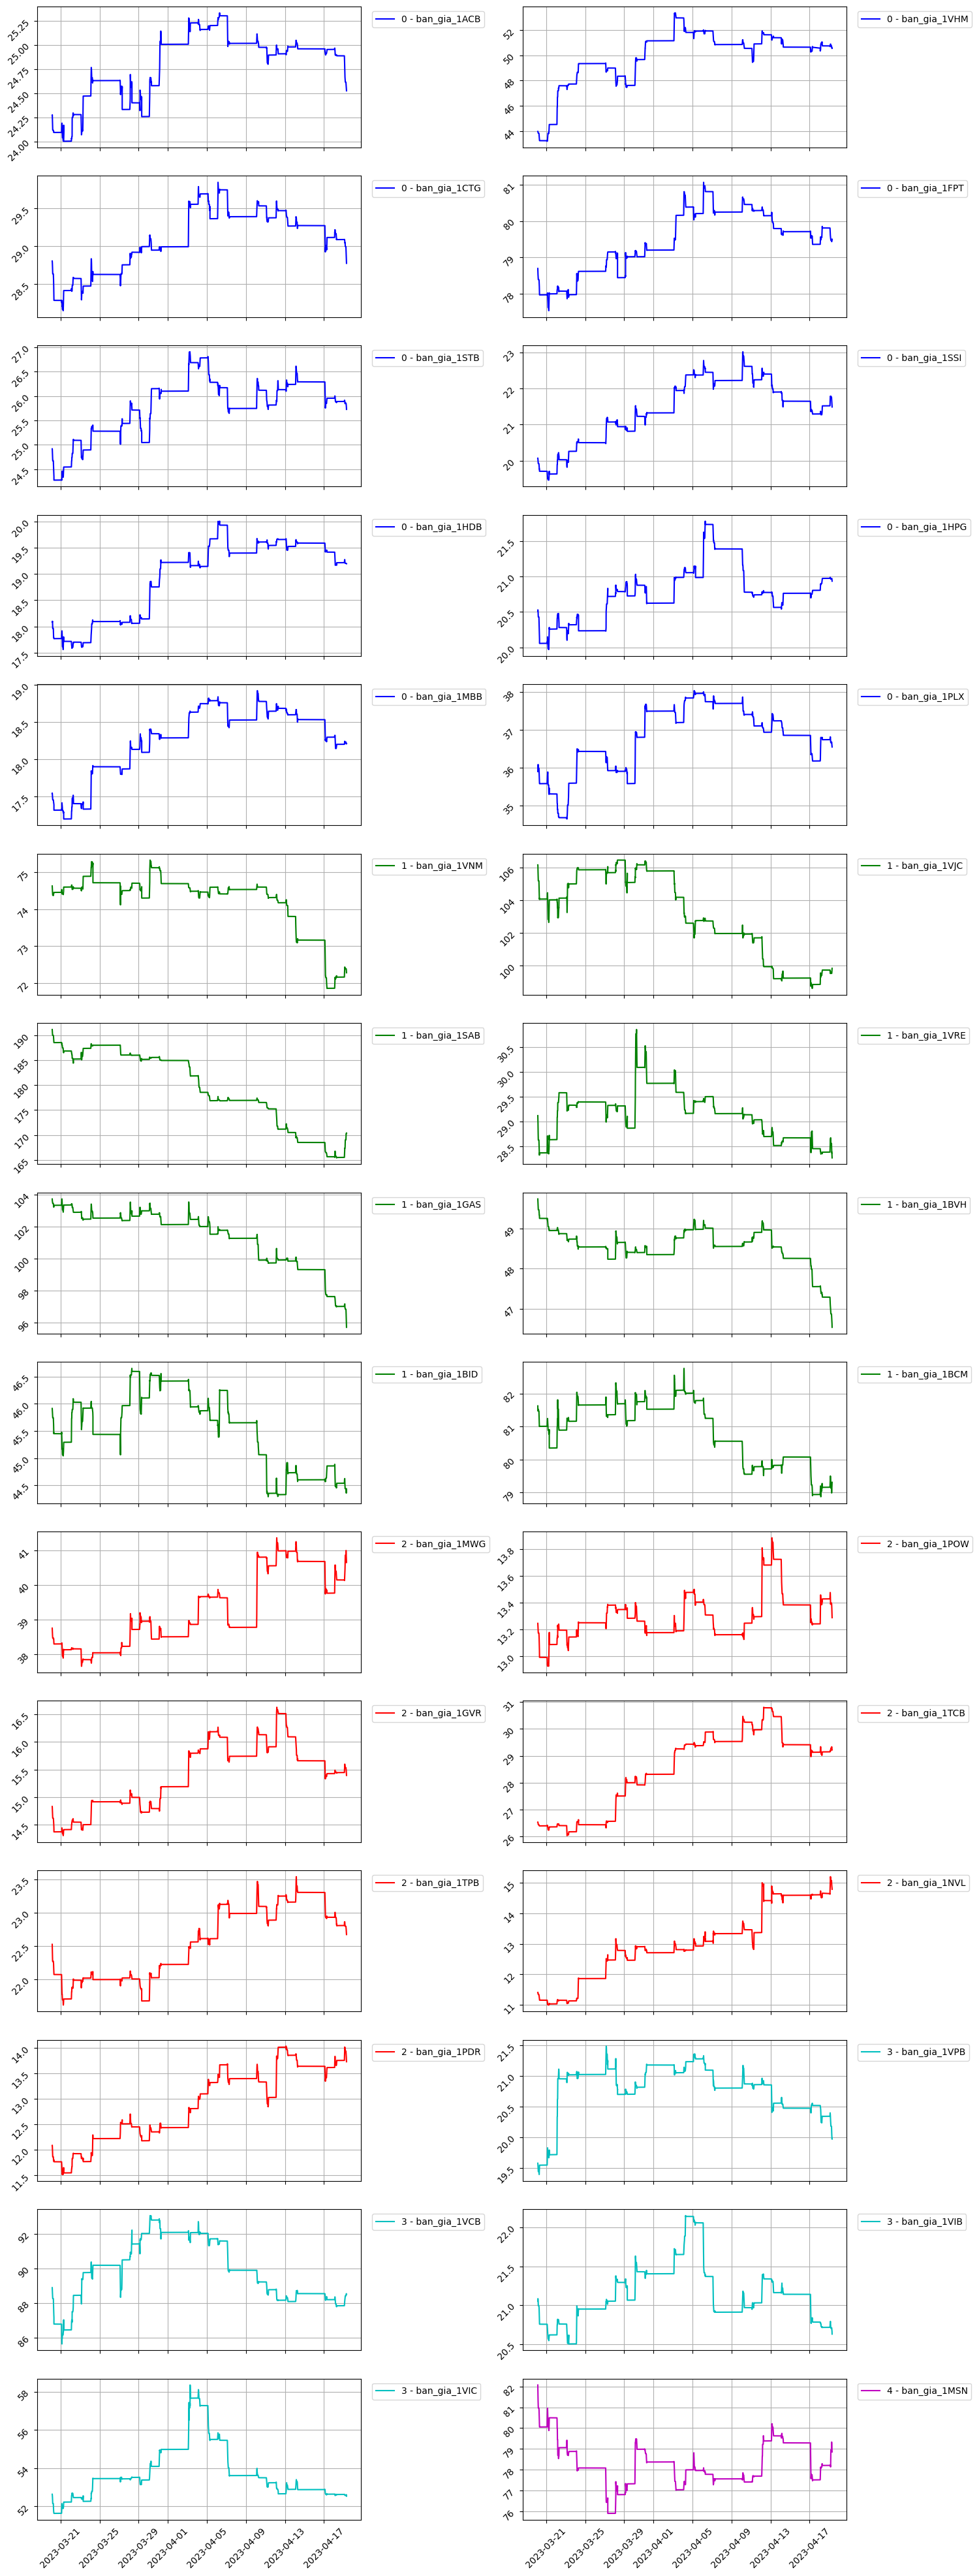

In [ ]:
visualizeLabel(predKmeans(date_sell_price_std.T, 5))

- Tạo DataFrame cho các cluster trong buy price và hiển thị số lượng trong từng cluster.

- Bên trên là visualize của nhóm chúng em với cách phân cụm theo xu hướng của các mã giá mua.

**Kết luận**

Chủ đích của việc nhóm em visualize là để từ các xu hướng của các cluster sẽ giúp chúng ta đưa ra các quyết định cho việc chọn mua các mã giá phù hợp, độ biến thiên của giá của các công ty trong các thời điểm (biến thiên ít -> ổn định, biến thiên nhiều -> biến động nhiều -> dễ sập) kĩ càng hơn trong các sự lựa chọn đặt mua một loại chứng khoán của công ty nào để phù hợp với các mục đích chơi chứng khoán của mình (lướt sóng hoặc nuôi chứng khoán). Tuy mọi thứ đều ở mặt tương đối nhưng có để chúng ta nhìn và tham khảo thì xác suất lựa chọn đúng cũng sẽ tăng lên

## Buy Weight

**Buy Weight, Sell Weight**

- Về khối lượng mua/bán thì sau khi làm giống như giá mua/bán ở trên thì nhóm em thấy khi clustering theo Khối lượng thì rất khó để tìm được số lượng cluster. Và khi visualize cũng khó tìm pattern trong từng nhóm.
- Nên từ đó nhóm chúng em chọn theo một hướng khác là cluster theo khối lượng để tìm các cluster có khối lượng lớn, vừa và nhỏ để dễ bày trong việc giải thích và cụ thể được trình bày bên dưới


**Lấy ra mã khối lượng mua của các công ty và sử dụng KMeans để phân cụm**

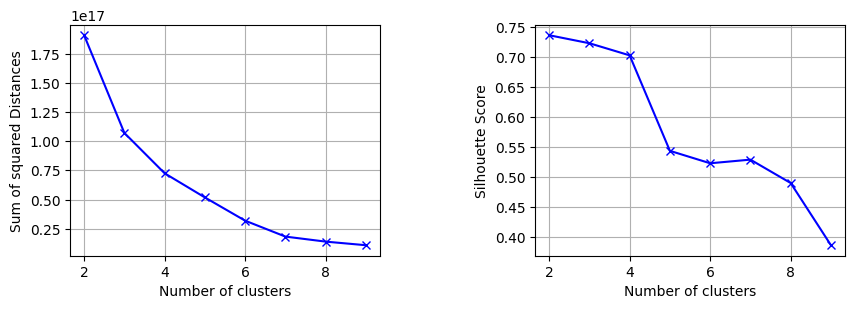

In [ ]:
visualizeScore(kmeans(date_buy_weight.T)[0], kmeans(date_buy_weight.T)[1])

**Choose k = 3 and Visualization**

Stock  Label Color
9   mua_kl_1HPG      0     b
10  mua_kl_1MBB      0     b
19  mua_kl_1STB      0     b
18  mua_kl_1SSI      0     b
28  mua_kl_1VPB      0     b
0   mua_kl_1ACB      1     g
27  mua_kl_1VNM      1     g
26  mua_kl_1VJC      1     g
25  mua_kl_1VIC      1     g
24  mua_kl_1VIB      1     g
23  mua_kl_1VHM      1     g
22  mua_kl_1VCB      1     g
21  mua_kl_1TPB      1     g
20  mua_kl_1TCB      1     g
17  mua_kl_1SAB      1     g
14  mua_kl_1PDR      1     g
12  mua_kl_1MWG      1     g
11  mua_kl_1MSN      1     g
8   mua_kl_1HDB      1     g
7   mua_kl_1GVR      1     g
6   mua_kl_1GAS      1     g
5   mua_kl_1FPT      1     g
4   mua_kl_1CTG      1     g
3   mua_kl_1BVH      1     g
2   mua_kl_1BID      1     g
1   mua_kl_1BCM      1     g
15  mua_kl_1PLX      1     g
29  mua_kl_1VRE      1     g
16  mua_kl_1POW      2     r
13  mua_kl_1NVL      2     r

Label
0     5
1    23
2     2
Name: Stock, dtype: int64

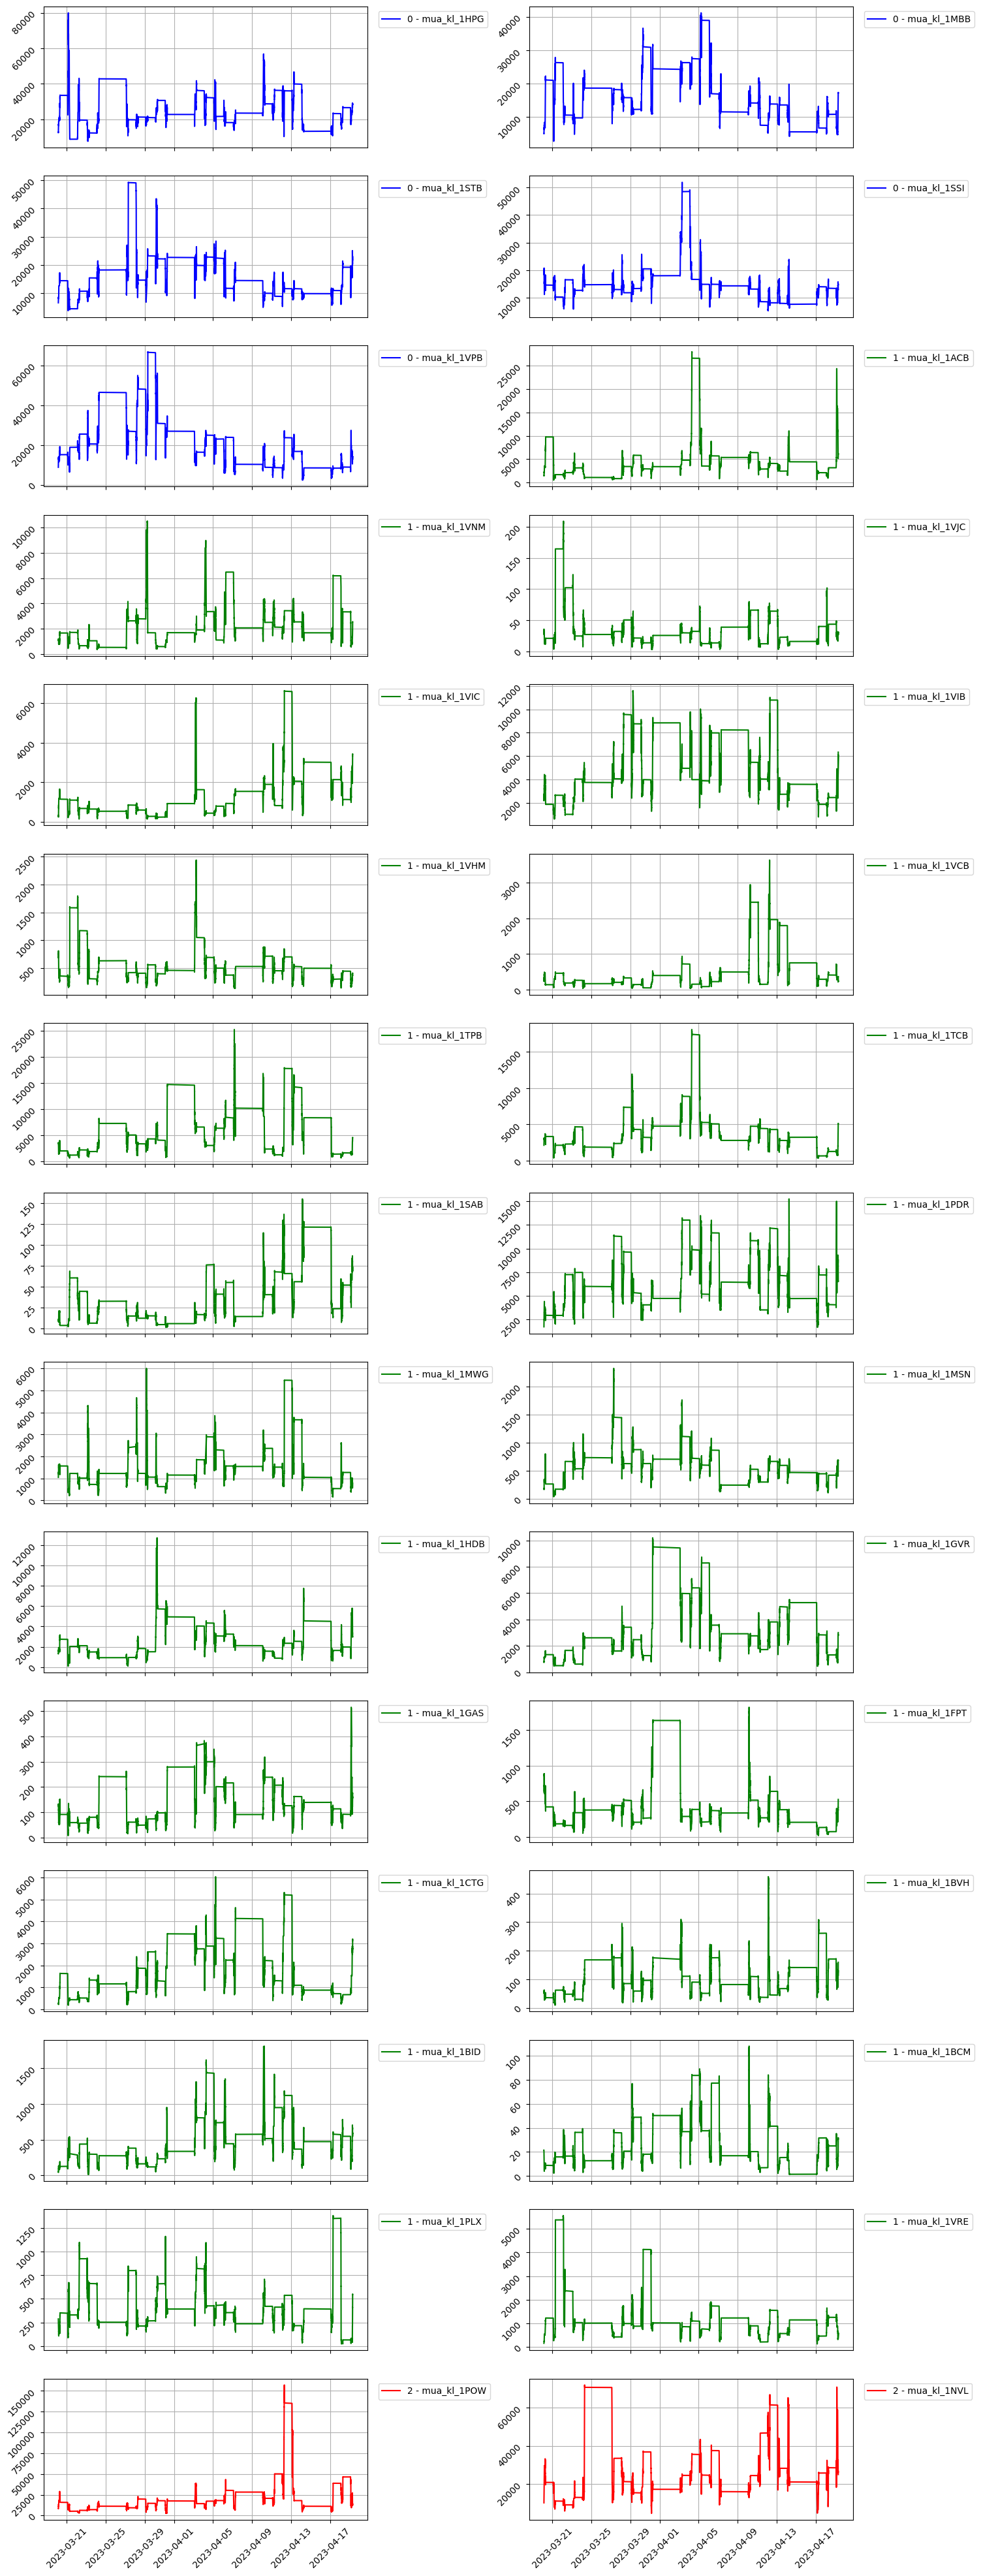

In [ ]:
visualizeLabel(predKmeans(date_buy_weight.T, 3))

- Tạo DataFrame cho các cluster trong buy weight và số lượng trong từng cluster.
- Và ở đây nhóm chúng em chọn cách phân cụm theo tổng khối lượng (nghĩa là các mã có khối lượng lớn sẽ vào chung một nhóm, vừa chung một nhóm và nhỏ chung một nhóm) vì theo nhóm chúng em khi nhìn vào các cột của khối lượng thì khả năng là mình sẽ quan tâm đến những mã nào đang được đặt mua nhiều (chứng tỏ những mã đó đang được quan tâm đến nhiều và ngược lại cho những mã có khối lượng đặt mua ít)

- Dưới đây là những cụm khối lượng mua mà nhóm em visualize ra (cụ thể là để Thầy có thể nhìn vào những mã có tổng khối lượng lớn/vừa/nhỏ) 

## Sell Weight

**Với ý tưởng tương tự như Buy Weight và nhóm chúng em thực hiện cho Sell Weight**

**Lấy ra mã khối lượng bán của các công ty và sử dụng KMeans để phân cụm**

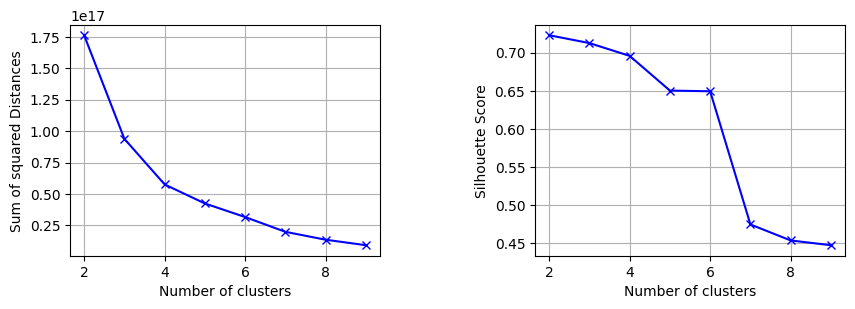

In [ ]:
visualizeScore(kmeans(date_sell_weight.T)[0], kmeans(date_sell_weight.T)[1])

**Choose k = 3 and Visualization**

Stock  Label Color
0   ban_kl_1ACB      0     b
27  ban_kl_1VNM      0     b
26  ban_kl_1VJC      0     b
25  ban_kl_1VIC      0     b
24  ban_kl_1VIB      0     b
23  ban_kl_1VHM      0     b
22  ban_kl_1VCB      0     b
21  ban_kl_1TPB      0     b
20  ban_kl_1TCB      0     b
17  ban_kl_1SAB      0     b
15  ban_kl_1PLX      0     b
12  ban_kl_1MWG      0     b
14  ban_kl_1PDR      0     b
7   ban_kl_1GVR      0     b
1   ban_kl_1BCM      0     b
2   ban_kl_1BID      0     b
3   ban_kl_1BVH      0     b
4   ban_kl_1CTG      0     b
5   ban_kl_1FPT      0     b
6   ban_kl_1GAS      0     b
11  ban_kl_1MSN      0     b
29  ban_kl_1VRE      0     b
8   ban_kl_1HDB      0     b
19  ban_kl_1STB      1     g
18  ban_kl_1SSI      1     g
16  ban_kl_1POW      1     g
10  ban_kl_1MBB      1     g
28  ban_kl_1VPB      1     g
13  ban_kl_1NVL      1     g
9   ban_kl_1HPG      2     r

Label
0    23
1     6
2     1
Name: Stock, dtype: int64

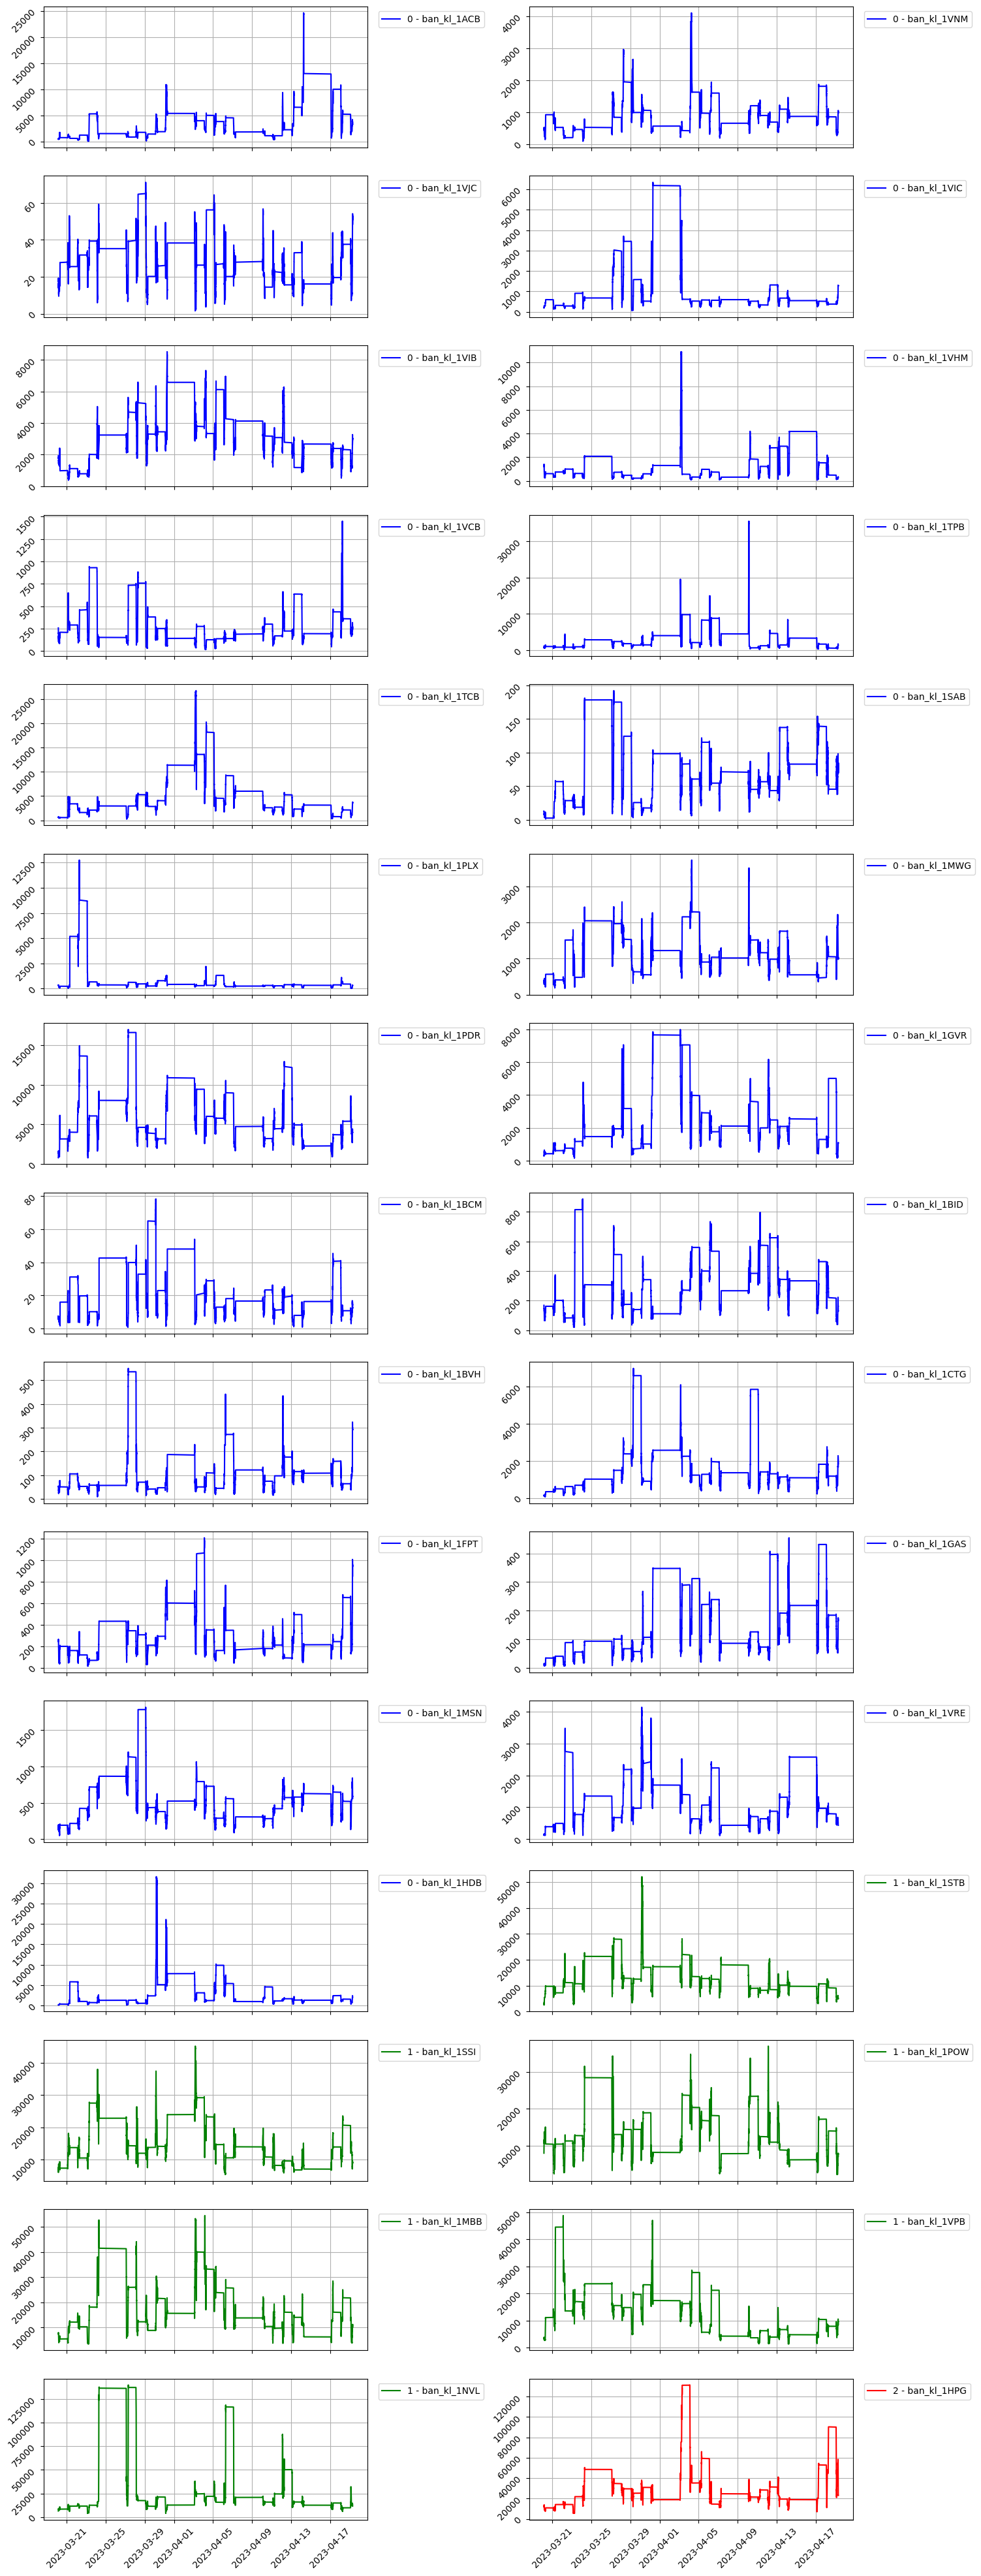

In [ ]:
visualizeLabel(predKmeans(date_sell_weight.T, 3))

- Tạo DataFrame cho các cluster trong sell weight và số lượng trong từng cluster.
- Và ở đây nhóm chúng em chọn cách phân cụm theo tổng khối lượng (nghĩa là các mã có khối lượng lớn sẽ vào chung một nhóm, vừa chung một nhóm và nhỏ chung một nhóm) vì theo nhóm chúng em khi nhìn vào các cột của khối lượng thì khả năng là mình sẽ quan tâm đến những mã nào đang được đặt bán nhiều (chứng tỏ những mã đó đang được quan tâm đến nhiều và ngược lại cho những mã có khối lượng đặt bán ít)
- Bên trên là những cluster khối lượng bán mà nhóm em visualize ra (cụ thể là để Thầy có thể nhìn vào những mã có tổng khối lượng lớn/vừa/nhỏ) 

**Kết luận**

 Chủ đích của việc visualize cho khối lượng không giống với giá bởi vì 2 mục đích cluster khác nhau. Mục đích của việc visualize khối lượng nhằm để nhóm và Thầy có thể thấy được trực tiếp tổng khối lượng của các mã chứng khoán, những mã của cluster nào thuộc top đầu (tổng khối lượng lớn), những mã của cluster nào thuộc top giữa, cuối để biết được nhóm công ty nào đang được quan tâm trên thị trường chứng khoán. 

##Day Time

Lúc này ta sẽ tách riêng các đặc trưng của các mã để tiện cho quá trình clustering

In [ ]:
featureListBanGia1 = []
featureListMuaGia1 = []
featureListMuaKL1 = []
featureListMuaKL2 = []
featureListBanKL1 = []
featureListBanKL2 = []
for _ in time_df.columns:
    if ('ban_gia_1' in _):
        featureListBanGia1.append(_)
    elif ('mua_gia_1' in _):
        featureListMuaGia1.append(_)
    elif ('mua_kl_1' in _):
        featureListMuaKL1.append(_)
    elif ('mua_kl_2' in _):
        featureListMuaKL2.append(_)
    elif ('ban_kl_1' in _):
        featureListBanKL1.append(_)
    elif ('ban_kl_2' in _):
        featureListBanKL2.append(_)

In [ ]:
# Chỉ dùng 4 đặc trưng về KL
featuresList = [featureListMuaKL1, featureListMuaKL2, featureListBanKL1, featureListBanKL2]
# Sử dụng hierarchical clustering để clustering
listOfClusters = []
for item in featuresList:
    listOfClusters.append(shc.linkage(time_df[item], method="ward", metric="euclidean"))

### Overview

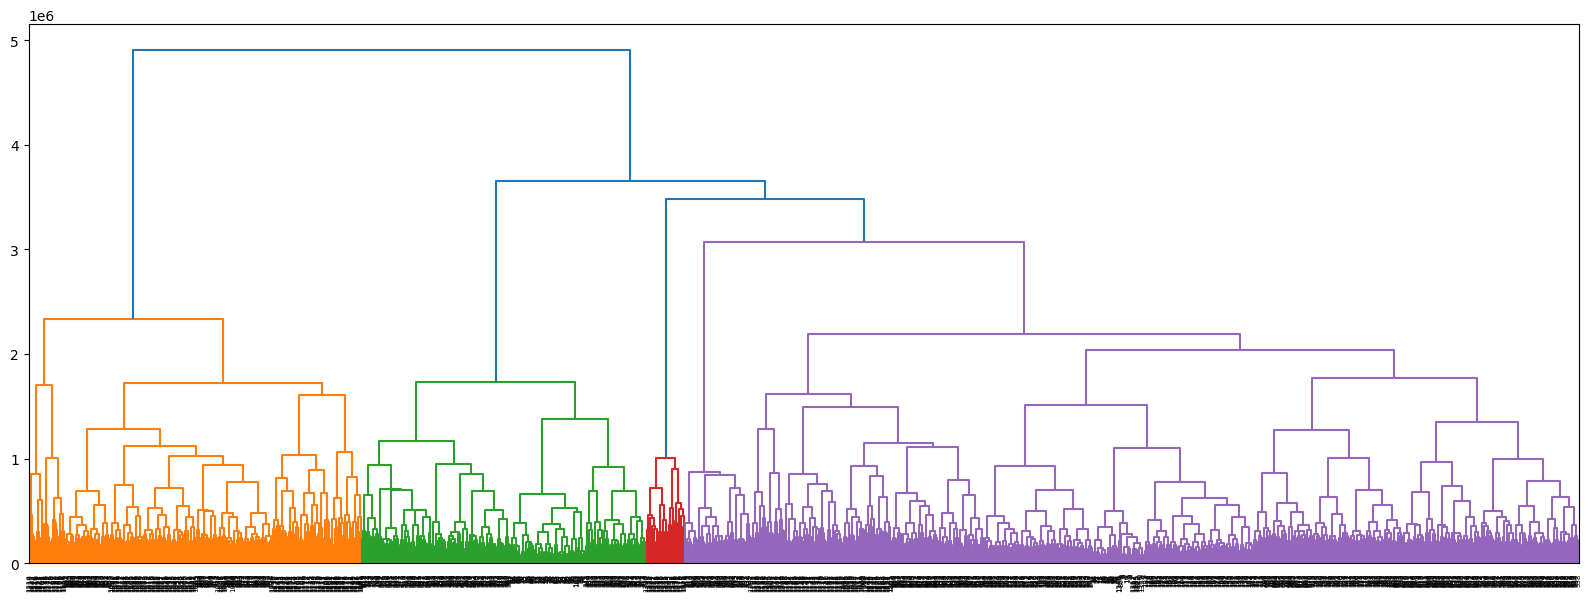

In [ ]:
# Mua KL1
plt.figure(figsize=(20, 7))
shc.dendrogram(Z = listOfClusters[0])
plt.show()

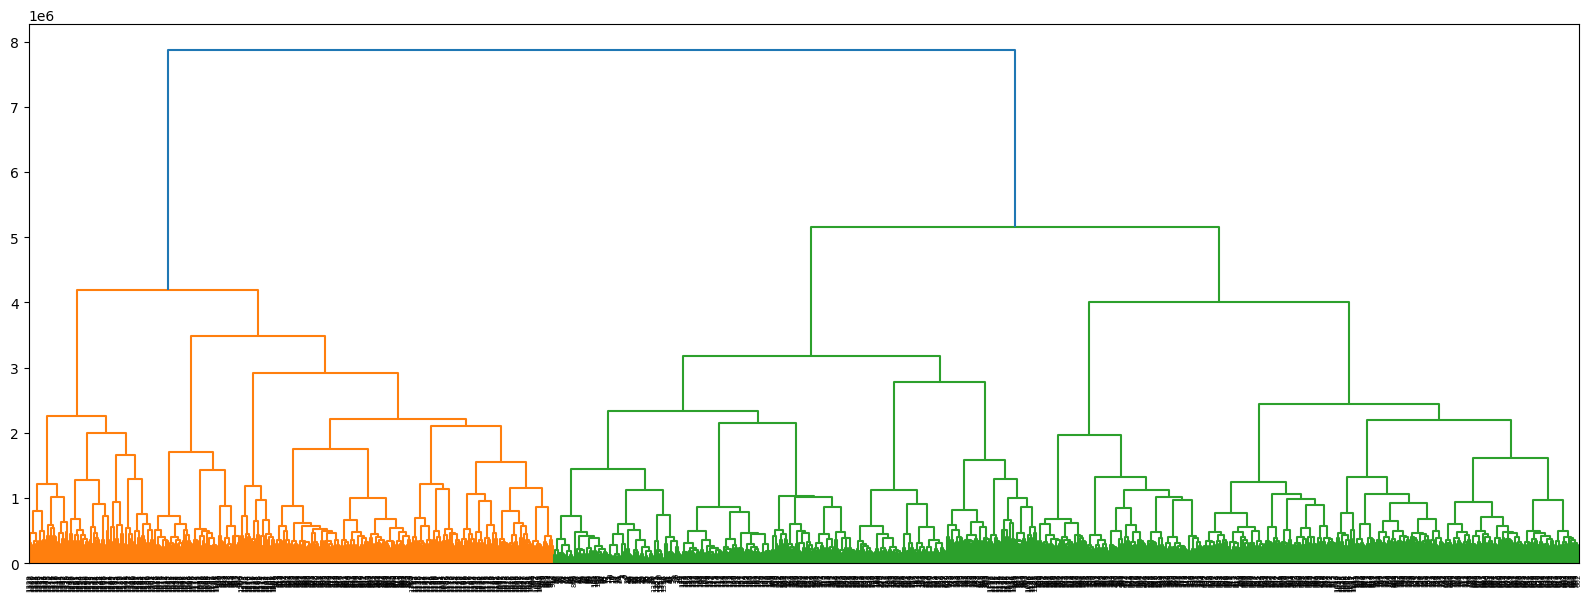

In [ ]:
# Mua KL2
plt.figure(figsize=(20, 7))
shc.dendrogram(Z = listOfClusters[1])
plt.show()

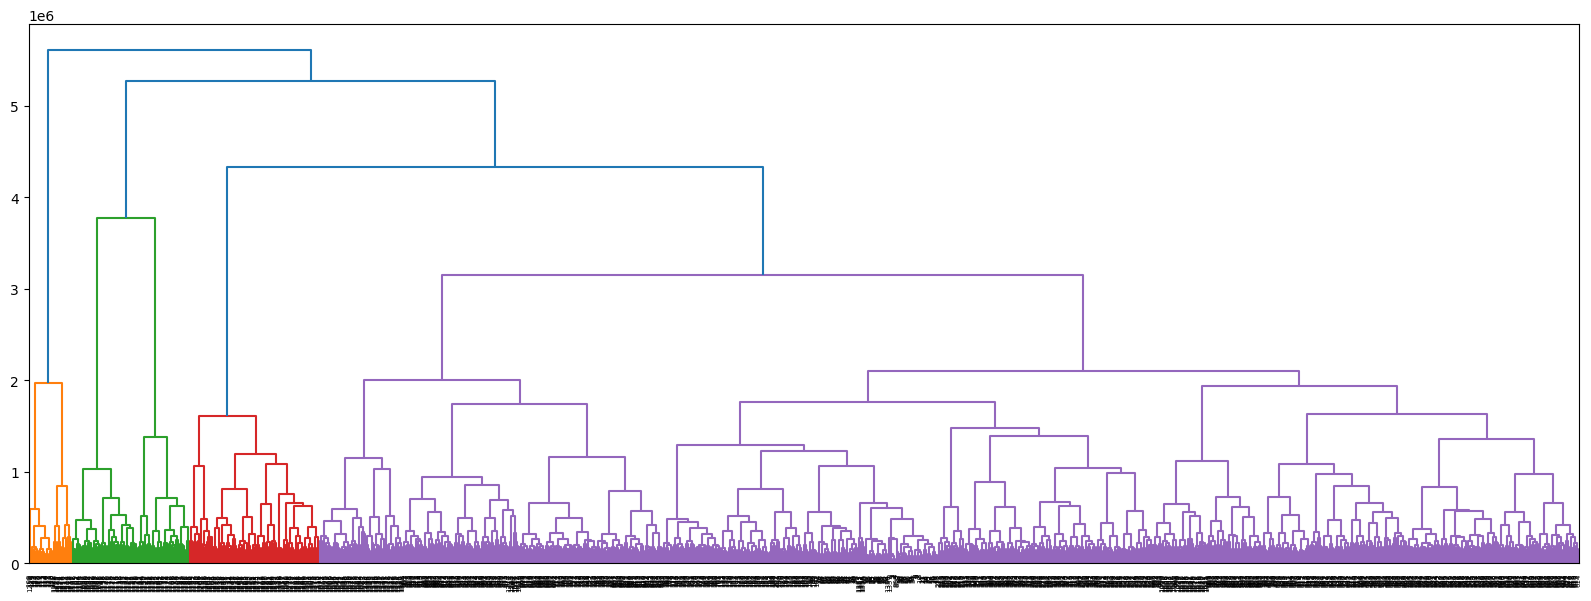

In [ ]:
# Ban KL1
plt.figure(figsize=(20, 7))
shc.dendrogram(Z = listOfClusters[2])
plt.show()

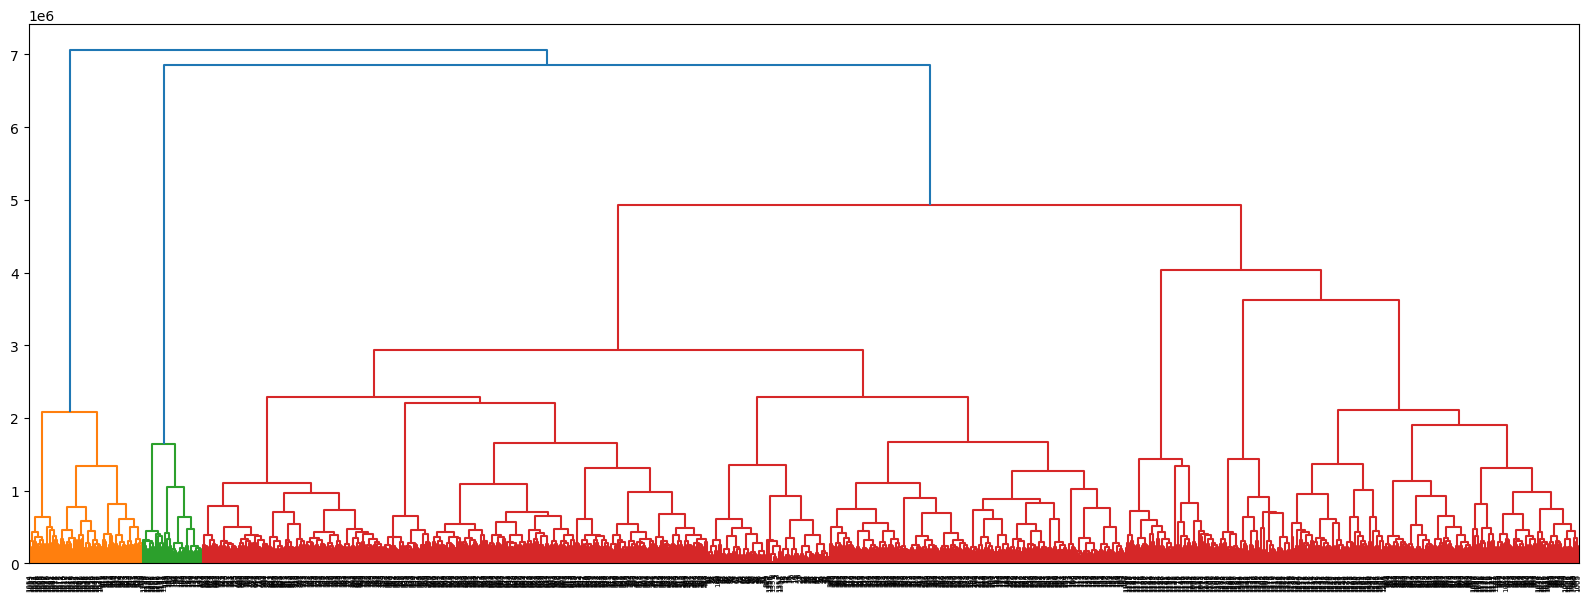

In [ ]:
# Ban KL2
plt.figure(figsize=(20, 7))
shc.dendrogram(Z = listOfClusters[3])
plt.show()

Một cách tổng quan, ta thấy kết quả "Mua KL2" khá ổn trong khi các đặc trưng còn lại bị hơi thiên vị về 1 cluster

In [ ]:
# Số lượng cluster chọn cho mỗi đặc trưng
n_clusters = [4, 2, 4, 3]

### Details

In [ ]:
from sklearn.cluster import AgglomerativeClustering

clustering_models = []

# Sử dụng sklear.cluster.AgglomerativeClustering để tiện cho quá trình phân tích về sau
for i, item in enumerate(featuresList):
    clustering_models.append(AgglomerativeClustering(n_clusters=n_clusters[i], affinity='euclidean', linkage='ward'))
    clustering_models[-1].fit(time_df[item])
    clustering_models[-1].labels_

#### Buy Weight 1

In [ ]:
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
for i in range(len(clustering_models[0].labels_)):
    if (clustering_models[0].labels_[i] == 0):
        cluster0.append(i)
    elif (clustering_models[0].labels_[i] == 1):
        cluster1.append(i)
    elif (clustering_models[0].labels_[i] == 2):
        cluster2.append(i)
    else:
        cluster3.append(i)

Kiểm tra trung bình tổng khối lượng mua của thời gian trong mỗi cluster

In [ ]:
print(f"""cluster 0:{time_df[featureListMuaKL1].iloc[cluster0].sum(axis='columns').mean()}
cluster 1:{time_df[featureListMuaKL1].iloc[cluster1].sum(axis='columns').mean()}
cluster 2:{time_df[featureListMuaKL1].iloc[cluster2].sum(axis='columns').mean()}
cluster 3:{time_df[featureListMuaKL1].iloc[cluster3].sum(axis='columns').mean()}""")

cluster 0:3518367.2680710503
cluster 1:4369784.048348463
cluster 2:3356805.3865868542
cluster 3:4906264.157378021


=> cluster 3 là thời điểm mua nhiều nhất trong khi 2 là ít nhất, 2 cluster còn lại ở giữa

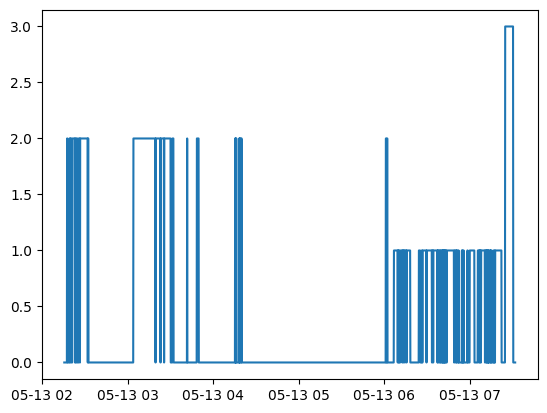

In [ ]:
plt.plot(pd.to_datetime(time_df[featureListMuaKL1].index), clustering_models[0].labels_)

Ta có thể thấy thời điểm có khối lượng mua nhiều nhất tập trung vào cuối thời điểm mở giao dịch (cluster 1 và 3)

#### Buy Weight 2

In [ ]:
cluster0 = []
cluster1 = []
for i in range(len(clustering_models[1].labels_)):
    if (clustering_models[1].labels_[i] == 0):
        cluster0.append(i)
    else:
        cluster1.append(i)

Kiểm tra trung bình tổng khối lượng mua của thời gian trong mỗi cluster

In [ ]:
print(f"""cluster 0:{time_df[featureListMuaKL2].iloc[cluster0].sum(axis='columns').mean()}
cluster 1:{time_df[featureListMuaKL2].iloc[cluster1].sum(axis='columns').mean()}""")

cluster 0:5820538.083647587
cluster 1:7758392.868546763


=> này thì tách nhau rõ hơn, tầm 6-7 h mua nhiều hơn hẳn

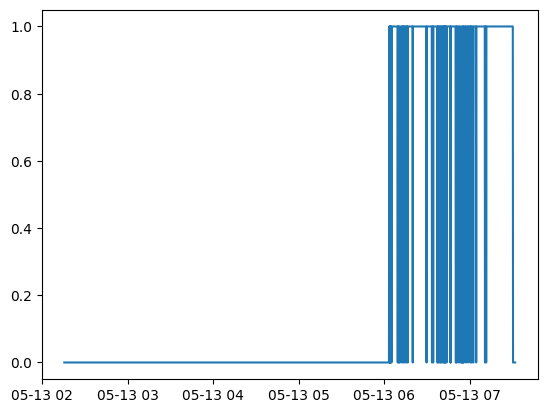

In [ ]:
plt.plot(pd.to_datetime(time_df[featureListMuaKL2].index), clustering_models[1].labels_)

Ta thấy thời điểm mua cũng tập trung nhiều hơn vào thời điểm cuối giao dịch (6-7 giờ, thuộc cluster 1)

#### Sell Weight 1

In [ ]:
cluster0 = []
cluster1 = []
cluster2 = []
cluster3 = []
for i in range(len(clustering_models[2].labels_)):
    if (clustering_models[2].labels_[i] == 0):
        cluster0.append(i)
    elif (clustering_models[2].labels_[i] == 1):
        cluster1.append(i)
    elif (clustering_models[2].labels_[i] == 2):
        cluster2.append(i)
    else:
        cluster3.append(i)

In [ ]:
print(f"""cluster 0:{time_df[featureListBanKL1].iloc[cluster0].sum(axis='columns').mean()}
cluster 1:{time_df[featureListBanKL1].iloc[cluster1].sum(axis='columns').mean()}
cluster 2:{time_df[featureListBanKL1].iloc[cluster2].sum(axis='columns').mean()}
cluster 3:{time_df[featureListBanKL1].iloc[cluster3].sum(axis='columns').mean()}""")

cluster 0:4367251.586090714
cluster 1:3912024.3246612605
cluster 2:2973291.6063166047
cluster 3:4094656.545763292


=> Có vẻ rõ nhất là cluster 2 vs phần còn lại

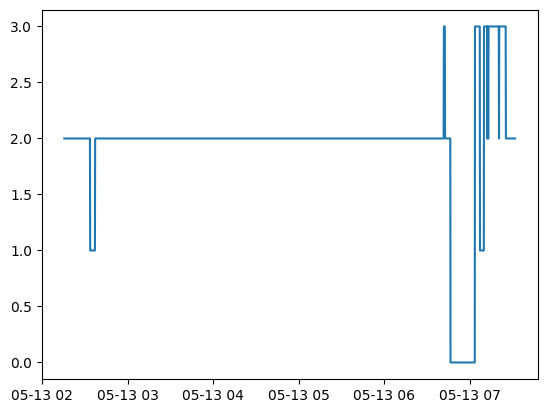

In [ ]:
plt.plot(pd.to_datetime(time_df[featureListBanKL1].index), clustering_models[2].labels_)

Thời gian bán KL nhiều cũng tập trung khá nhiều vào tầm cuối buổi giao dịch

#### Sell Weight 2

In [ ]:
cluster0 = []
cluster1 = []
cluster2 = []
for i in range(len(clustering_models[3].labels_)):
    if (clustering_models[3].labels_[i] == 0):
        cluster0.append(i)
    elif (clustering_models[3].labels_[i] == 1):
        cluster1.append(i)
    else:
        cluster2.append(i)

In [ ]:
print(f"""cluster 0:{time_df[featureListBanKL2].iloc[cluster0].sum(axis='columns').mean()}
cluster 1:{time_df[featureListBanKL2].iloc[cluster1].sum(axis='columns').mean()}
cluster 2:{time_df[featureListBanKL2].iloc[cluster2].sum(axis='columns').mean()}""")

cluster 0:5101429.9853765
cluster 1:6919449.574248078
cluster 2:5785581.933121004


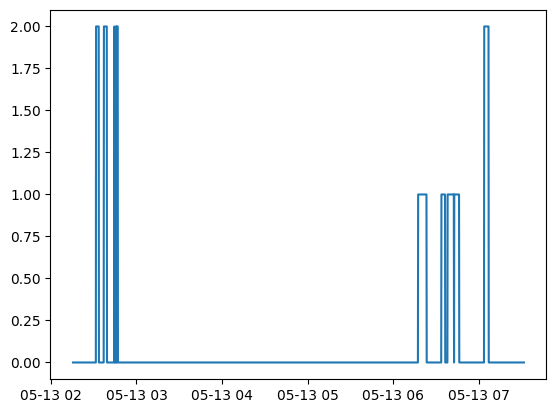

In [ ]:
plt.plot(pd.to_datetime(time_df[featureListBanKL2].index), clustering_models[3].labels_)

=> Ta cũng nhận thấy đa số ban KL tăng ở thời điểm cuối thời gian giao dịch

### Remark

- Các cluster khác nhau nói lên sự khác biệt trong KL bán/mua
- Xu hướng chung của các giao dịch là từ 6-7 giờ
- Sự khác biệt giữa các khối lượng trong thời điểm "peak" và phần còn lại thường không quá lớn

# Forecasting "Gia KL"

In [ ]:
forecasting_df = total_df.copy()

# Tạo time-stamp features và lag_1 feature
lag_1 = forecasting_df["Gia KL"].shift(1)
days = forecasting_df.index.dayofweek
hours = forecasting_df.index.hour
minutes = forecasting_df.index.minute
seconds = forecasting_df.index.second

forecasting_df['lag_1'] = lag_1
forecasting_df['days'] = days
forecasting_df['hours'] = hours
forecasting_df['minutes'] = minutes
forecasting_df['seconds'] = seconds

X = forecasting_df.loc[:, ['lag_1', 'days', 'hours', 'minutes', 'seconds']]
X.dropna(inplace = True)

y = forecasting_df.loc[:, "Gia KL"]
y, X = y.align(X, join = 'inner')

# Tập train là trước ngày 16/4, tập test là từ ngày 16/4 trở về sau
train_X = X[X.index <= "2023-04-16 00:00:00+00:00"]
test_X = X[X.index > "2023-04-16 00:00:00+00:00"]
train_y = y[y.index <= "2023-04-16 00:00:00+00:00"]
test_y = y[y.index > "2023-04-16 00:00:00+00:00"]

model = LinearRegression().fit(train_X, train_y)
y_pred = pd.Series(model.predict(test_X), index = test_X.index)

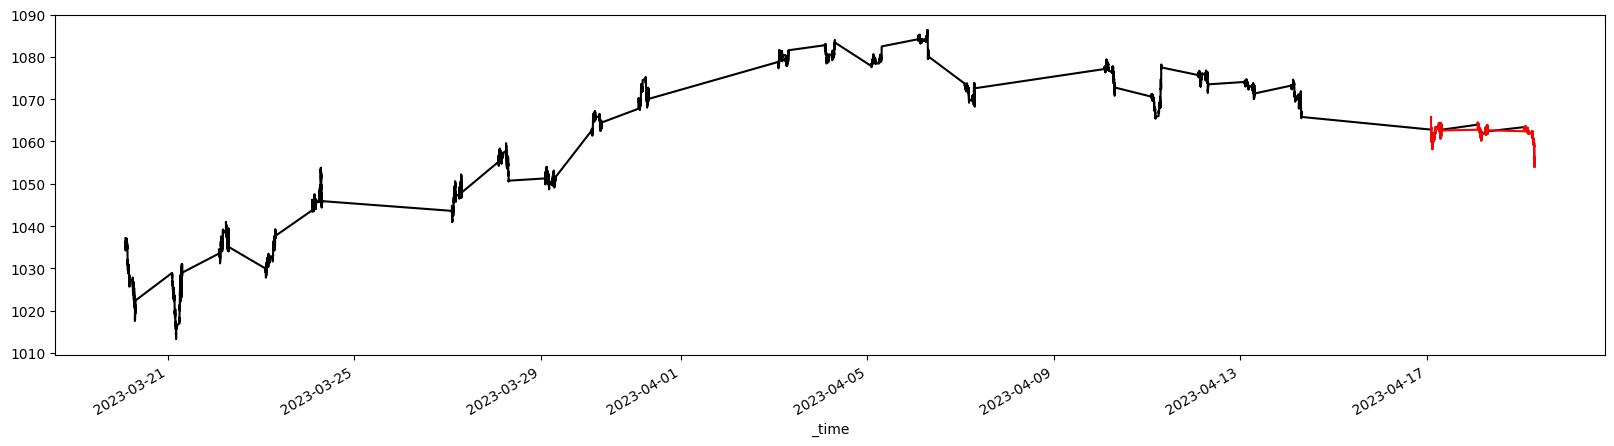

In [ ]:
fig = plt.figure(figsize = (20, 5))
ax = y.plot(color = "black")
ax = y_pred.plot(color = "red")

In [ ]:
print(f"RMSE: {mean_squared_error(y_pred, test_y)}")

RMSE: 0.012949698708295623


Ta có thể thấy sử dụng Linear regression với time-stamp và lag features khá hiệu quả

# Conclusion

Nhóm em đã áp dụng các thuật toán được học: Linear Regression, PCA, K-means và các thuật toán tham khảo trên Internet liên quan đến các thuật toán được học. Đồng thời, tìm hiểu về domain knowledge để hiểu dữ liệu, lựa chọn thuật toán, phân nhóm hợp lý và nhận xét điểm chung của các đối tượng cùng nhóm.

| Phần 	| Kết quả đạt được 	|
|:---:	|:---:	|
| PCA 	| Kết hợp được tính chất của time-series trong PCA; <br>Tiếp cận giải quyết vấn đề bằng 3 hướng, có so sánh và giải thích kèm minh họa;<br>Sử dụng thuật toán non-negative PCA để ước lượng tầm quan trọng của từng mã. 	|
| Clustering 	| 2 hướng cluster: theo mã và theo thời gian;<br>Sử dụng các metrics để tìm k tối ưu cho thuật toán K-means;<br>Tìm xu hướng chung của mỗi nhóm sau khi phân chia;<br>Sử dụng hierarchical clustering đối với thời gian. 	|
| Forecast 	| Sử dụng linear-regression để dự đoán 'Gia KL' trong tuần kế tiếp. 	|